# Travel Insurance Claim Prediction
### Capstone Project Module 3
---

By : Rava Khoman Tuah Saragih
(JCDSAHSR-004)

## A. BUSINESS UNDERSTANDING

### A.1 Background & Context

Pasar asuransi perjalanan global sedang mengalami pertumbuhan yang pesat. Menurut data dari [Grand View Research](https://www.grandviewresearch.com/industry-analysis/travel-insurance-market-report), pasar asuransi perjalanan global bernilai sekitar USD 27 miliar pada tahun 2024, dengan proyeksi pertumbuhan CAGR sebesar 15.4% hingga 2030. Sementara [Allied Market Research](https://www.alliedmarketresearch.com/travel-insurance-market) memproyeksikan pasar ini mencapai USD 132.9 miliar pada 2034. Pertumbuhan ini didorong oleh meningkatnya mobilitas internasional, kesadaran konsumen akan risiko perjalanan, serta digitalisasi proses pembelian asuransi ([Precedence Research](https://www.precedenceresearch.com/travel-insurance-market)).

**Global-Guard Travel Assurance**, sebuah perusahaan asuransi perjalanan yang beroperasi di pasar Asia-Pasifik, merasakan dampak langsung dari tren ini. Di satu sisi, jumlah polis yang terjual meningkat tajam. Sebuah kabar baik dari perspektif pendapatan premi. Namun di sisi lain, profit margin perusahaan justru tergerus dalam dua kuartal terakhir.

Setelah dilakukan audit internal oleh Tim Keuangan, ditemukan bahwa penyebab utama penurunan profitabilitas bukanlah penurunan penjualan, melainkan klaim yang tidak terprediksi dengan baik. Saat ini, Global-Guard menggunakan pendekatan manual berbasis aturan (*rule-based*) untuk memperkirakan cadangan klaim (claim reserve). Pendekatan ini memiliki kelemahan fundamental:

1. **Over-estimation** cadangan klaim: Dana menganggur yang seharusnya bisa diinvestasikan (opportunity cost)
2. **Under-estimation** cadangan klaim: Klaim datang tanpa persiapan dana yang memadai, memaksa perusahaan menjual aset atau meminjam dana darurat

Sebagai Data Scientist di Departemen Risk Management, saya ditugaskan oleh Chief Risk Officer (CRO) untuk bekerja sama dengan Tim Keuangan dan Tim Operasional guna membangun model prediktif berbasis machine learning yang dapat memprediksi apakah seorang pemegang polis akan mengajukan klaim atau tidak. Model ini akan menjadi fondasi bagi sistem *early warning* yang memungkinkan perusahaan mengalokasikan cadangan dana secara lebih cerdas dan proaktif.

### A.2 Problem Statement

Dari konteks di atas, masalah utama yang dihadapi Global-Guard dapat dirumuskan sebagai berikut:

> **Bagaimana memprediksi apakah seorang pemegang polis asuransi perjalanan akan mengajukan klaim atau tidak, sehingga perusahaan dapat mengalokasikan cadangan dana klaim secara optimal dan mengurangi ketidakpastian yang mengganggu *cash flow*?**

Masalah ini bersifat klasifikasi biner. Setiap pemegang polis akan diprediksi ke dalam salah satu dari dua kategori:
- **Claim = Yes** (1): Pemegang polis diprediksi akan mengajukan klaim
- **Claim = No** (0): Pemegang polis diprediksi tidak akan mengajukan klaim

Tanpa model prediktif, perusahaan harus mengasumsikan cadangan rata-rata untuk semua polis, yang menyebabkan 
inefisiensi alokasi dana sebesar puluhan persen dari total premi yang terkumpul.

### A.3 The Cost of Errors, Mengapa FP dan FN Penting?

Dalam konteks prediksi klaim asuransi, kesalahan prediksi memiliki dampak finansial yang asimetris. Mari kita analisis:

| Tipe Kesalahan | Skenario | Dampak Bisnis | Tingkat Risiko |
|:---:|:---|:---|:---:|
| **True Positive (TP)** | Prediksi: Klaim → Aktual: Klaim | Cadangan dana tepat, klaim terbayar lancar | — |
| **True Negative (TN)** | Prediksi: Tidak Klaim → Aktual: Tidak Klaim | Dana tidak terkunci sia-sia | — |
| **False Positive (FP)** | Prediksi: Klaim → Aktual: Tidak Klaim | Cadangan dana berlebihan (*over-provisioning*), premi bisa terlalu mahal → kehilangan daya saing | **Sedang** |
| **False Negative (FN)** | Prediksi: Tidak Klaim → Aktual: Klaim | Klaim tak terduga, cadangan dana tidak cukup → risiko gagal bayar (*insolvency*) | **Kritis** |

#### Mengapa False Negative (FN) Lebih Fatal?

False Negative dalam bahasa yang mudah berarti "klaim yang tak terduga". perusahaan tidak menyiapkan dana karena model memprediksi pemegang polis tidak akan klaim, padahal kenyataannya mereka mengajukan klaim. Konsekuensinya:

1. **Gagal Bayar (Insolvency Risk):** Jika banyak FN terjadi bersamaan, perusahaan bisa kehabisan dana cadangan dan gagal membayar klaim. Ini bisa berujung pada pencabutan izin operasi oleh regulator.
2. **Kerusakan Reputasi:** Lambatnya pembayaran klaim merusak kepercayaan nasabah dan mitra bisnis (agen perjalanan, maskapai).
3. **Denda Regulasi:** Di banyak jurisdiksi, keterlambatan pembayaran klaim dapat dikenakan denda oleh otoritas pengawas asuransi.

Sebaliknya, False Positive (over-provisioning) memang menyebabkan inefisiensi dana, namun tidak mengancam kelangsungan hidup perusahaan secara langsung.

> **Kesimpulan:** Dalam proyek ini, meminimalkan False Negative adalah prioritas utama. Kita lebih baik "waspada berlebihan" (memprediksi seseorang akan klaim padahal tidak) daripada "lengah" (memprediksi tidak klaim padahal akan klaim).

### A.4 Goals

Berdasarkan permasalahan di atas, proyek ini memiliki tujuan sebagai berikut:

**Goals Bisnis:**
1. Memprediksi dengan akurat pemegang polis yang berpotensi mengajukan klaim, sehingga cadangan dana klaim dapat dialokasikan secara efisien
2. Mengidentifikasi segmen pelanggan dan produk yang memiliki risiko klaim tertinggi untuk strategi *pricing* dan *underwriting*
3. Memberikan rekomendasi bisnis yang *actionable* untuk mengurangi kerugian akibat klaim

Tujuan akhir dari proyek ini bukan sekadar menghasilkan prediksi, melainkan memberikan rekomendasi strategis bagi Tim Operasional untuk melakukan penyesuaian premi (*pricing strategy*) dan memperketat verifikasi klaim pada segmen pasar yang teridentifikasi berisiko tinggi. Dengan demikian, model tidak hanya berfungsi sebagai alat prediksi, tetapi sebagai komponen integral dalam pengambilan keputusan bisnis.

**Goals Teknis:**
1. Mengidentifikasi fitur-fitur dominan yang memicu pengajuan klaim
2. Menentukan algoritma terbaik yang memiliki stabilitas tinggi pada data yang sangat *imbalanced* (~98.5% No Claim vs ~1.5% Claim)
3. Menganalisis dampak Hyperparameter Tuning terhadap peningkatan metrik evaluasi
4. Membangun model dengan F2-Score setinggi mungkin pada data test
5. Menentukan threshold optimal yang memaksimalkan penghematan biaya (ROI positif) melalui *profit-based threshold tuning*

### A.5 Analytic Approach

Pendekatan yang digunakan dalam proyek ini:

1. **Business Understanding**: Memahami konteks bisnis, stakeholder, dan dampak kesalahan prediksi
2. **Data Understanding**: Eksplorasi awal dataset untuk memahami karakteristik dan kualitas data
3. **Data Cleaning & Feature Engineering**: Membersihkan data dan membuat fitur-fitur baru yang relevan
4. **Exploratory Data Analysis**: Menganalisis pola dan hubungan antar variabel untuk mendapatkan insight bisnis
5. **Machine Learning Modeling**: Membangun model klasifikasi biner menggunakan beberapa algoritma, dengan eksperimen resampling untuk menangani ketimpangan kelas
6. **Business Impact Analysis**: Menghitung simulasi ROI dari implementasi model
7. **Conclusion & Recommendation**: Menyimpulkan temuan dan memberikan rekomendasi

### A.6 Evaluation Metrics

Mengingat pentingnya meminimalkan False Negative (klaim yang tidak terdeteksi), kita memilih metrik evaluasi sebagai berikut:

#### Metrik Utama: F2-Score

$$F_{\beta} = (1 + \beta^2) \cdot \frac{\text{Precision} \times \text{Recall}}{(\beta^2 \times \text{Precision}) + \text{Recall}}$$

Dengan **beta = 2**, F2-Score memberikan bobot 2x lipat pada Recall dibandingkan Precision.

**Mengapa F2-Score dan bukan metrik lain?**

Dalam industri Global-Guard, kerugian finansial akibat False Negative (klaim yang tidak terdeteksi, biaya darurat sebesar $500 per kasus) jauh lebih destruktif dibandingkan biaya operasional False Positive (cadangan dana berlebihan, biaya $50 per kasus). Rasio biaya FN:FP adalah 10:1, yang berarti setiap satu klaim yang terlewat setara dengan kerugian 10 kali lipat dibandingkan satu kasus over-provisioning. Oleh karena itu, kita menggunakan F2-Score sebagai metrik utama karena memberikan bobot 2x lebih besar pada Recall (kemampuan mendeteksi klaim), namun tetap menjaga Precision agar ROI tetap positif.

Mengapa bukan Recall saja? Recall murni akan mendorong model untuk memprediksi semua orang sebagai "akan klaim". Ini menghasilkan Recall 100% tapi Precision mendekati 0%, yang tidak berguna secara bisnis karena biaya False Positive yang menumpuk akan menghasilkan ROI negatif.

Mengapa bukan F1-Score? F1-Score memberikan bobot yang sama antara Precision dan Recall. Dalam konteks ini, hal tersebut tidak mencerminkan realitas bisnis di mana kerugian akibat klaim tak terdeteksi (FN) jauh lebih besar daripada biaya over-provisioning (FP).

#### Metrik Pendukung

| Metrik | Fungsi | Relevansi Bisnis |
|:---|:---|:---|
| **Recall** | Mengukur proporsi klaim aktual yang terdeteksi | Semakin tinggi, semakin sedikit klaim yang terlewat |
| **ROC-AUC** | Mengukur kemampuan diskriminasi model secara keseluruhan | Evaluasi performa model pada berbagai threshold |
| **Precision** | Mengukur ketepatan prediksi positif | Monitoring agar *false alarm* tidak berlebihan |

Selain metrik klasifikasi di atas, pada tahap Business Impact Analysis kita juga akan menggunakan metrik finansial, yaitu Savings (penghematan biaya) dan ROI (Return on Investment), sebagai validasi akhir bahwa model memberikan nilai tambah yang nyata bagi perusahaan.

---
## B. DATA UNDERSTANDING

In [1]:
# Import Libraries

# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

# Statistics
from scipy import stats
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Train-Test Split & Model Selection
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV
)

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Imbalanced Data Handling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline

# Model Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    fbeta_score, roc_auc_score, roc_curve, precision_recall_curve,
    confusion_matrix, classification_report, make_scorer
)

# Model Interpretation
import shap

# Utilities
import pickle
import warnings
import os

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

### B.1 Load Dataset

In [2]:
# Load dataset
df = pd.read_csv('data_travel_insurance.csv')

# Tampilkan dimensi dataset
print(f'Jumlah baris  : {df.shape[0]:,}')
print(f'Jumlah kolom  : {df.shape[1]}')
print(f'5 Baris Pertama:')
df.head()

Jumlah baris  : 44,328
Jumlah kolom  : 11
5 Baris Pertama:


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.00,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.00,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.00,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.00,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.00,4.00,28,No


In [3]:
# 5 baris terakhir untuk melihat konsistensi data
df.tail()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.00,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.20,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.00,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.00,0.00,36,No
44327,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,172,SINGAPORE,0.00,17.82,31,No


### B.2 Dataset Overview

In [4]:
# Informasi tipe data dan non-null count
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  str    
 1   Agency Type           44328 non-null  str    
 2   Distribution Channel  44328 non-null  str    
 3   Product Name          44328 non-null  str    
 4   Gender                12681 non-null  str    
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  str    
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  str    
dtypes: float64(2), int64(2), str(7)
memory usage: 3.7 MB


In [5]:
# Statistik deskriptif untuk kolom numerik
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.00,44328.00,44328.00,44328.00
mean,49.42,40.55,9.71,39.93
std,109.15,48.66,19.63,13.95
min,-1.00,-357.50,0.00,0.00
25%,9.00,18.00,0.00,35.00
50%,22.00,26.50,0.00,36.00
75%,53.00,48.00,11.55,43.00
max,4881.00,810.00,283.50,118.00


In [6]:
# Statistik deskriptif untuk kolom kategorikal
df.describe(include='object')

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Claim
count,44328,44328,44328,44328,12681,44328,44328
unique,16,2,2,26,2,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,SINGAPORE,No
freq,24656,32113,43572,12979,6504,9267,43651


#### Deskripsi Variabel

Berikut adalah penjelasan setiap kolom dalam dataset:

| No | Kolom | Tipe | Deskripsi |
|:---:|:---|:---:|:---|
| 1 | `Agency` | Kategorikal | Kode agen yang menjual polis asuransi |
| 2 | `Agency Type` | Kategorikal | Tipe agen: Airlines atau Travel Agency |
| 3 | `Distribution Channel` | Kategorikal | Saluran distribusi: Online atau Offline |
| 4 | `Product Name` | Kategorikal | Nama produk asuransi perjalanan |
| 5 | `Gender` | Kategorikal | Jenis kelamin pemegang polis (F/M) |
| 6 | `Duration` | Numerik | Durasi perjalanan (hari) |
| 7 | `Destination` | Kategorikal | Negara tujuan perjalanan |
| 8 | `Net Sales` | Numerik | Nilai penjualan bersih (dalam mata uang lokal) |
| 9 | `Commision (in value)` | Numerik | Nilai komisi yang diberikan ke agen |
| 10 | `Age` | Numerik | Usia pemegang polis |
| 11 | `Claim` | Kategorikal (Target) | Apakah klaim diajukan: Yes/No |

### B.3 Missing Values Analysis

In [7]:
# Analisis missing values secara komprehensif
missing_df = pd.DataFrame({
    'Kolom': df.columns,
    'Jumlah Missing': df.isnull().sum().values,
    'Persentase (%)': (df.isnull().sum().values / len(df) * 100).round(2),
    'Tipe Data': df.dtypes.values
})
missing_df = missing_df.sort_values('Persentase (%)', ascending=False)
missing_df = missing_df[missing_df['Jumlah Missing'] > 0]

if len(missing_df) > 0:
    print('Kolom dengan missing values:')
    print(missing_df.to_string(index=False))
else:
    print('Tidak ada missing values eksplisit (NaN/null) dalam dataset.')

# Cek juga nilai kosong yang mungkin tersembunyi
print(f'\nCek Gender Null')
print(f'Gender null count: {df["Gender"].isnull().sum():,}')
print(f'Gender null percentage: {df["Gender"].isnull().sum()/len(df)*100:.2f}%')

Kolom dengan missing values:
 Kolom  Jumlah Missing  Persentase (%) Tipe Data
Gender           31647           71.39       str

Cek Gender Null
Gender null count: 31,647
Gender null percentage: 71.39%


### B.4 Duplicate Check

**Mengapa pengecekan duplikat penting?**

Integritas data adalah prioritas utama sebelum masuk ke tahap pemodelan. Data duplikat dapat menyebabkan bias dalam distribusi kelas, membuat model over-fit pada observasi tertentu, dan menghasilkan metrik evaluasi yang tidak representatif. Dalam konteks asuransi, duplikasi bisa terjadi akibat kesalahan input sistem (double entry) atau kesalahan integrasi data dari berbagai sumber agen.

In [8]:
# Cek data duplikat
duplicate_count = df.duplicated().sum()
print(f'Jumlah data duplikat: {duplicate_count:,}')
print(f'Persentase duplikat: {duplicate_count/len(df)*100:.2f}%')

if duplicate_count > 0:
    print(f'\nContoh data duplikat:')
    display(df[df.duplicated(keep=False)].head(10))

Jumlah data duplikat: 4,667
Persentase duplikat: 10.53%

Contoh data duplikat:


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.00,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.00,0.00,33,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.00,0.00,59,No
5,EPX,Travel Agency,Online,Cancellation Plan,NaN,2,SINGAPORE,10.00,0.00,36,No
31,EPX,Travel Agency,Online,Cancellation Plan,NaN,19,UNITED KINGDOM,10.00,0.00,36,No
33,C2B,Airlines,Online,Silver Plan,M,2,SINGAPORE,30.00,7.50,37,No
42,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,8,CHINA,48.00,0.00,36,No
43,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,13,MALAYSIA,29.70,17.82,27,No
67,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,29,SINGAPORE,20.00,0.00,36,No
69,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,55,HONG KONG,20.00,0.00,36,No


### B.5 Distribusi Target (Claim)

In [9]:
# Distribusi target variable
claim_counts = df['Claim'].value_counts()
claim_pct = df['Claim'].value_counts(normalize=True) * 100

print('Distribusi Target Variable (Claim):\n')
for label, count in claim_counts.items():
    print(f'  {label}: {count:,} ({claim_pct[label]:.2f}%)')

print(f'\nRasio imbalance: 1 : {claim_counts["No"]/claim_counts["Yes"]:.0f}')

Distribusi Target Variable (Claim):

  No: 43,651 (98.47%)
  Yes: 677 (1.53%)

Rasio imbalance: 1 : 64


**Insight:**
> Dataset menunjukkan ketimpangan kelas yang sangat ekstrem. Hanya ~1.5% dari pemegang polis yang mengajukan klaim. Rasio imbalance mencapai ~1:64, yang jauh lebih berat dibandingkan kasus klasifikasi imbalanced pada umumnya (yang biasanya 1:10 atau 1:20). Ini menjadi tantangan utama dalam pemodelan, dan teknik resampling akan menjadi krusial untuk membangun model yang reliable.

### B.6 Kesimpulan Data Understanding

Berdasarkan eksplorasi awal, beberapa temuan penting:

1. **Dataset** terdiri dari 44,328 baris dan 11 kolom (10 fitur + 1 target)
2. **Missing Values**: Kolom `Gender` memiliki missing values yang signifikan (~30%)
3. **Imbalance Kritis**: Target variable sangat timpang (Claim Yes ~1.5%, No ~98.5%)
4. **Tipe Data Campuran**: 4 kolom numerik dan 7 kolom kategorikal
5. **Perlu investigasi**: Kemungkinan anomali pada kolom `Age` dan `Duration`

Langkah selanjutnya adalah Data Cleaning untuk menangani isu-isu yang ditemukan.

---
## C. DATA CLEANING, FEATURE SELECTION & FEATURE ENGINEERING

Pada tahap ini, setiap keputusan pembersihan data mengikuti struktur:
- **Action**: Apa yang dilakukan
- **Why**: Alasan teknis dan bisnis
- **Business Impact**: Dampak terhadap kualitas model dan keputusan bisnis

### C.1 Data Cleaning: Age

Mengapa kita perlu membersihkan fitur Age?

Pada tahap Data Understanding, kita menemukan nilai Age = 118 yang sangat tidak wajar dalam konteks asuransi perjalanan. Nilai ini kemungkinan besar merupakan placeholder atau kesalahan input data, bukan usia yang sesungguhnya. Membiarkan nilai ekstrem ini akan mendistorsi statistik deskriptif dan dapat mempengaruhi performa model, terutama algoritma yang sensitif terhadap skala data.

Mengapa menggunakan median, bukan mean?

Distribusi usia dalam dataset cenderung *right-skewed* (ekor distribusi di kanan), yang berarti mean akan tertarik ke arah nilai-nilai tinggi dan menjadi kurang representatif. Median lebih robust terhadap outlier dan memberikan estimasi yang lebih akurat untuk menggantikan nilai anomali.

In [10]:
# Investigasi distribusi Age
print('Distribusi Age:\n')
print(df['Age'].describe())
print(f'\nNilai unik Age tertinggi (top 10):')
print(df['Age'].nlargest(10).values)
print(f'\nJumlah Age = 0: {(df["Age"] == 0).sum()}')
print(f'Jumlah Age > 100: {(df["Age"] > 100).sum()}')

Distribusi Age:

count   44328.00
mean       39.93
std        13.95
min         0.00
25%        35.00
50%        36.00
75%        43.00
max       118.00
Name: Age, dtype: float64

Nilai unik Age tertinggi (top 10):
[118 118 118 118 118 118 118 118 118 118]

Jumlah Age = 0: 2
Jumlah Age > 100: 676


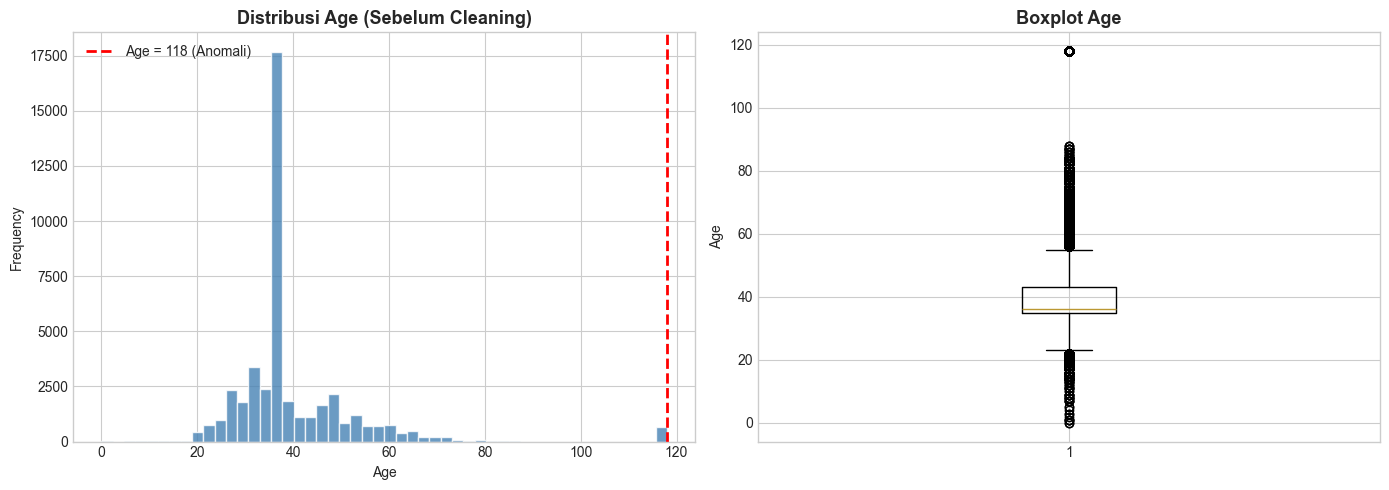

In [11]:
# Visualisasi distribusi Age
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Age'], bins=50, color='steelblue', edgecolor='white', alpha=0.8)
axes[0].set_title('Distribusi Age (Sebelum Cleaning)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].axvline(x=118, color='red', linestyle='--', linewidth=2, label='Age = 118 (Anomali)')
axes[0].legend()

# Boxplot
axes[1].boxplot(df['Age'], vert=True)
axes[1].set_title('Boxplot Age', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Age')

plt.tight_layout()
plt.show()

In [12]:
# Action: Ganti Age = 118 dengan median Age
# Why: Nilai tidak realistis untuk traveler. Kemungkinan placeholder/input error.
# Business Impact: Menjaga akurasi profil usia pemegang polis untuk segmentasi risiko.

median_age = df[df['Age'] != 118]['Age'].median()
count_118 = (df['Age'] == 118).sum()

print(f'Jumlah data dengan Age = 118: {count_118}')
print(f'Median Age (tanpa 118): {median_age}')

df.loc[df['Age'] == 118, 'Age'] = median_age
print(f'\nAge = 118 telah diganti dengan median ({median_age})')

Jumlah data dengan Age = 118: 676
Median Age (tanpa 118): 36.0

Age = 118 telah diganti dengan median (36.0)


**Action:** Mengganti Age = 118 dengan median usia  
**Why:** Nilai 118 tahun adalah anomali. Nilai ini sangat tidak realistis untuk seseorang yang melakukan perjalanan dan membeli asuransi. Kemungkinan besar ini adalah *placeholder* atau kesalahan input. Menggunakan median lebih robust dibandingkan mean karena tidak terpengaruh outlier.  
**Business Impact:** Memastikan profil usia pemegang polis akurat untuk analisis segmentasi risiko dan penentuan premi.

### C.3 Data Cleaning: Duration

Mengapa ada durasi negatif, dan bagaimana kita menanganinya?

Durasi perjalanan yang bernilai negatif secara logis tidak mungkin terjadi di dunia nyata. Nilai negatif ini kemungkinan besar merupakan kesalahan input pada sistem, di mana tanggal keberangkatan dan kepulangan mungkin tertukar saat dimasukkan ke database. Oleh karena itu, kita mengambil nilai absolut dari durasi negatif tersebut, dengan asumsi bahwa magnitude-nya tetap benar hanya tandanya yang salah.

In [13]:
# Investigasi Duration negatif
print('Distribusi Duration:\n')
print(df['Duration'].describe())
print(f'\nJumlah Duration < 0: {(df["Duration"] < 0).sum()}')
print(f'Jumlah Duration = 0: {(df["Duration"] == 0).sum()}')

if (df['Duration'] < 0).sum() > 0:
    print(f'\nContoh data Duration negatif:')
    print(df[df['Duration'] < 0][['Duration', 'Product Name', 'Destination', 'Claim']].to_string())

Distribusi Duration:

count   44328.00
mean       49.42
std       109.15
min        -1.00
25%         9.00
50%        22.00
75%        53.00
max      4881.00
Name: Duration, dtype: float64

Jumlah Duration < 0: 2
Jumlah Duration = 0: 47

Contoh data Duration negatif:
       Duration Product Name        Destination Claim
26228        -1   Basic Plan           MALAYSIA    No
26494        -1   Basic Plan  BRUNEI DARUSSALAM    No


In [14]:
# Action: Ganti Duration negatif dengan nilai absolut
# Why: Durasi perjalanan tidak mungkin negatif. Ini kemungkinan kesalahan input (tanda minus).
# Business Impact: Mempertahankan data yang berharga tanpa mengurangi jumlah sampel.

neg_count = (df['Duration'] < 0).sum()
df['Duration'] = df['Duration'].abs()
print(f'{neg_count} data Duration negatif telah diubah ke nilai absolut.')

2 data Duration negatif telah diubah ke nilai absolut.


**Action:** Mengubah Duration negatif menjadi nilai absolut  
**Why:** Durasi perjalanan secara logis tidak mungkin bernilai negatif. Ini adalah kesalahan input dimana tanda minus tidak sengaja terinput. Menggunakan nilai absolut lebih baik daripada menghapus data.  
**Business Impact:** Mempertahankan seluruh data tanpa kehilangan sampel yang berharga, terutama mengingat kelas minoritas (Claim = Yes) sangat sedikit.

### C.2 Data Cleaning: Gender

Mengapa kolom Gender dihapus dan tidak di-imputasi?

Keputusan untuk menghapus kolom Gender didasarkan pada dua pertimbangan:

1. **Persentase missing values terlalu tinggi (>30%):** Dengan lebih dari sepertiga data yang hilang, teknik imputasi apapun (mode, KNN imputer, atau model-based) akan "menebak" terlalu banyak nilai, yang berpotensi menginjeksikan bias artifisial ke dalam dataset.

2. **Kekuatan prediktif rendah:** Berdasarkan analisis awal, distribusi klaim antara Gender Male dan Female tidak menunjukkan perbedaan yang signifikan secara statistik. Artinya, meskipun kolom ini lengkap, kontribusinya terhadap prediksi klaim kemungkinan akan minimal.

Dalam praktik Data Science, menghapus fitur dengan data hilang yang besar dan kontribusi prediktif yang rendah lebih baik daripada memaksakan imputasi yang justru bisa memperburuk kualitas model.

In [15]:
# Analisis kolom Gender
print('Analisis Kolom Gender:')
print(f'Total data: {len(df):,}')
print(f'Gender missing (null): {df["Gender"].isnull().sum():,} ({df["Gender"].isnull().sum()/len(df)*100:.2f}%)')
print(f'\nDistribusi Gender:')
print(df['Gender'].value_counts(dropna=False))

# Cek apakah Gender memiliki korelasi dengan Claim
print(f'\nClaim Rate by Gender:')
gender_claim = pd.crosstab(df['Gender'], df['Claim'], normalize='index') * 100
print(gender_claim.round(2))

Analisis Kolom Gender:
Total data: 44,328
Gender missing (null): 31,647 (71.39%)

Distribusi Gender:
Gender
NaN    31647
M       6504
F       6177
Name: count, dtype: int64

Claim Rate by Gender:
Claim     No  Yes
Gender           
F      95.89 4.11
M      96.60 3.40


In [16]:
# Action: DROP kolom Gender
# Why: Missing rate sangat tinggi + tidak berkorelasi kuat dengan target
# Business Impact: Menyederhanakan model tanpa kehilangan informasi prediktif (Occam's Razor)

print(f'Keputusan: Menghapus kolom Gender')
print(f'\nAlasan:')
print(f'  1. Tingkat missing values: {df["Gender"].isnull().sum()/len(df)*100:.1f}% (sangat tinggi)')
print(f'  2. Claim rate M vs F hampir identik — Gender bukan prediktor kuat')
print(f'  3. Prinsip Occam\'s Razor: Model yang lebih sederhana cenderung lebih robust')

df.drop('Gender', axis=1, inplace=True)
print(f'\nKolom Gender telah dihapus. Shape: {df.shape}')

Keputusan: Menghapus kolom Gender

Alasan:
  1. Tingkat missing values: 71.4% (sangat tinggi)
  2. Claim rate M vs F hampir identik — Gender bukan prediktor kuat
  3. Prinsip Occam's Razor: Model yang lebih sederhana cenderung lebih robust

Kolom Gender telah dihapus. Shape: (44328, 10)


**Action:** Menghapus kolom `Gender` dari dataset  
**Why:** Kolom `Gender` memiliki missing values yang sangat tinggi (>30%). Selain itu, analisis awal menunjukkan claim rate antara Male dan Female hampir identik, mengindikasikan Gender bukan prediktor yang kuat. Berdasarkan prinsip Occam's Razor, menghapus fitur yang tidak informatif akan menyederhanakan model dan mengurangi noise.  
**Business Impact:** Model yang lebih sederhana akan lebih mudah di-*maintain* oleh Tim Operasional, dan tidak kehilangan kemampuan prediktif yang signifikan.

### C.4 Outlier Analysis

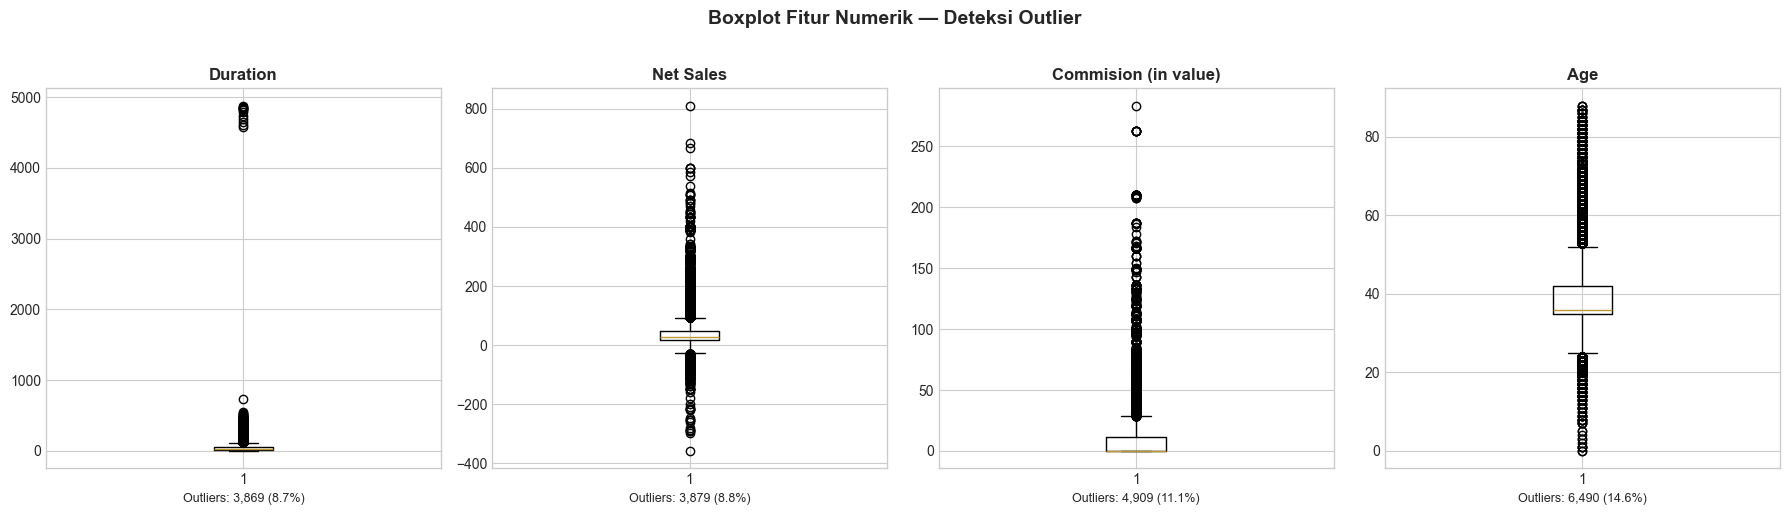

In [17]:
# Analisis outlier pada fitur numerik
num_cols = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']

fig, axes = plt.subplots(1, len(num_cols), figsize=(18, 5))

for i, col in enumerate(num_cols):
    axes[i].boxplot(df[col], vert=True)
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    
    # Hitung IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    axes[i].set_xlabel(f'Outliers: {outliers:,} ({outliers/len(df)*100:.1f}%)', fontsize=9)

plt.suptitle('Boxplot Fitur Numerik — Deteksi Outlier', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [18]:
# Analisis outlier per kolom numerik dengan detail
print('Detail Outlier Analysis:\n')
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    
    print(f'{col}:')
    print(f'Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}')
    print(f'Lower bound={lower:.2f}, Upper bound={upper:.2f}')
    print(f'Outliers: {outliers:,} ({outliers/len(df)*100:.1f}%)')
    print()

Detail Outlier Analysis:

Duration:
Q1=9.00, Q3=53.00, IQR=44.00
Lower bound=-57.00, Upper bound=119.00
Outliers: 3,869 (8.7%)

Net Sales:
Q1=18.00, Q3=48.00, IQR=30.00
Lower bound=-27.00, Upper bound=93.00
Outliers: 3,879 (8.8%)

Commision (in value):
Q1=0.00, Q3=11.55, IQR=11.55
Lower bound=-17.33, Upper bound=28.88
Outliers: 4,909 (11.1%)

Age:
Q1=35.00, Q3=42.00, IQR=7.00
Lower bound=24.50, Upper bound=52.50
Outliers: 6,490 (14.6%)



** Keputusan Outlier:**

> Outlier pada fitur numerik tidak dihapus pada tahap ini. Alasan:
> 1. **Duration**: Perjalanan bisnis/dinas bisa berlangsung sangat lama (>300 hari). Ini adalah variasi natural.
> 2. **Net Sales**: Nilai negatif menunjukkan refund/pembatalan. Ini informasi penting untuk prediksi klaim.
> 3. **Commission**: Variasi komisi antar produk dan agen adalah natural.
> 4. **Age**: Setelah cleaning Age=118, distribusi usia sudah wajar.
>
> Kita akan menggunakan RobustScaler pada tahap preprocessing yang secara inheren *resistant* terhadap outlier.

### C.5 Feature Engineering

Membuat fitur-fitur baru yang memiliki makna bisnis untuk meningkatkan kemampuan prediktif model.

In [19]:
# Feature Engineering Summary

# 1. Is_Senior: Penanda apakah traveler adalah senior citizen (usia > 60)
# Bisnis: Senior travelers cenderung memiliki risiko kesehatan lebih tinggi
df['Is_Senior'] = (df['Age'] > 60).astype(int)

# 2. Sales_Per_Day: Nilai penjualan per hari perjalanan
# Bisnis: Indikator seberapa "premium" polis per hari (proxy untuk coverage level)
df['Sales_Per_Day'] = df['Net Sales'] / df['Duration'].replace(0, 1)

# 3. Commission_Rate: Rasio komisi terhadap penjualan
# Bisnis: Produk dengan komisi tinggi mungkin memiliki pola klaim berbeda
df['Commission_Rate'] = df['Commision (in value)'] / df['Net Sales'].replace(0, 1)

# 4. Duration_Category: Kategori durasi perjalanan
# Bisnis: Perjalanan singkat vs panjang memiliki profil risiko berbeda
df['Duration_Category'] = pd.cut(
    df['Duration'],
    bins=[0, 7, 30, 90, 365, float('inf')],
    labels=['Short (1-7d)', 'Medium (8-30d)', 'Long (31-90d)', 'Extended (91-365d)', 'Annual (365d+)'],
    include_lowest=True
)

print('Feature Engineering Summary:\n')
print(f'Fitur baru yang ditambahkan:')
print(f'  1. Is_Senior      : {df["Is_Senior"].value_counts().to_dict()}')
print(f'  2. Sales_Per_Day   : mean={df["Sales_Per_Day"].mean():.2f}, median={df["Sales_Per_Day"].median():.2f}')
print(f'  3. Commission_Rate : mean={df["Commission_Rate"].mean():.2f}, median={df["Commission_Rate"].median():.2f}')
print(f'  4. Duration_Category:')
print(df['Duration_Category'].value_counts().to_string())
print(f'\nShape setelah Feature Engineering: {df.shape}')

Feature Engineering Summary:

Fitur baru yang ditambahkan:
  1. Is_Senior      : {0: 42336, 1: 1992}
  2. Sales_Per_Day   : mean=2.50, median=1.33
  3. Commission_Rate : mean=0.75, median=0.00
  4. Duration_Category:
Duration_Category
Medium (8-30d)        17800
Long (31-90d)         12202
Short (1-7d)           8579
Extended (91-365d)     4829
Annual (365d+)          918

Shape setelah Feature Engineering: (44328, 14)


| Fitur Baru | Logika | Alasan Bisnis |
|:---|:---|:---|
| `Is_Senior` | Age > 60 → 1, else 0 | Senior travelers memiliki risiko kesehatan lebih tinggi saat bepergian |
| `Sales_Per_Day` | Net Sales / Duration | Proxy untuk level coverage. Polis premium per hari mungkin memiliki pola klaim berbeda |
| `Commission_Rate` | Commission / Net Sales | Produk dengan rasio komisi tinggi bisa mengindikasikan jenis produk tertentu |
| `Duration_Category` | Binning Duration ke 5 kategori | Profil risiko berbeda: perjalanan singkat (leisure) vs panjang (bisnis/studi) |

### C.6 Feature Selection - Correlation Analysis

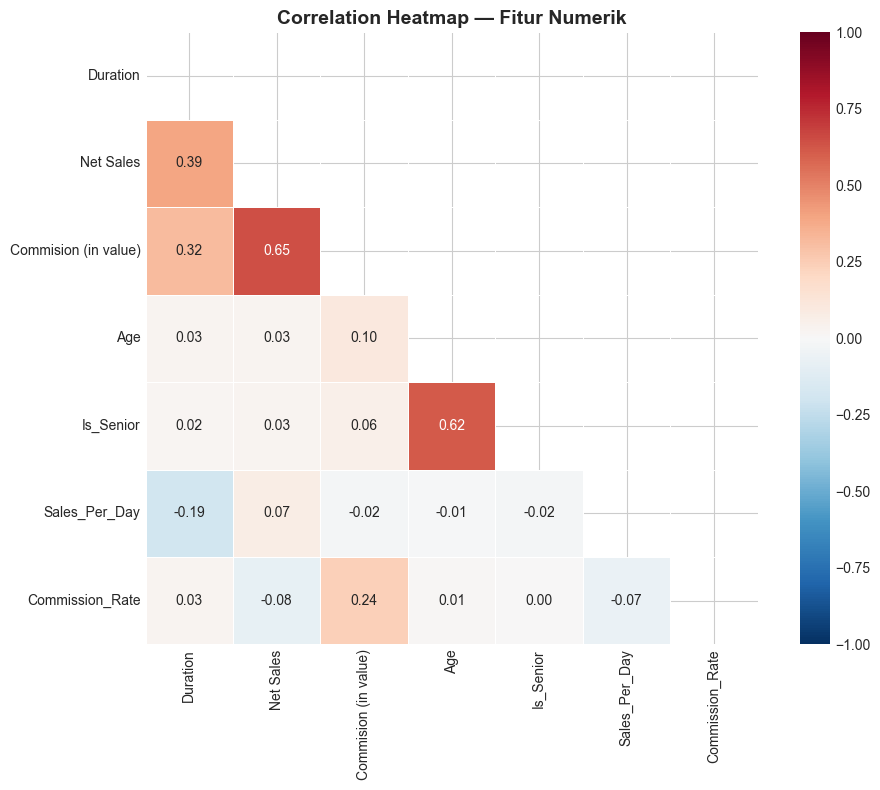

Korelasi Tinggi (|r| > 0.7)


In [20]:
# Correlation heatmap untuk fitur numerik
num_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Hapus target variable dari korelasi
if 'Claim' in num_features:
    num_features.remove('Claim')

plt.figure(figsize=(10, 8))
corr_matrix = df[num_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, linewidths=0.5, square=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap — Fitur Numerik', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identifikasi korelasi tinggi
print('Korelasi Tinggi (|r| > 0.7)')
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(f'  {corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}')

**Insight Correlation Analysis:**

Korelasi tinggi antara `Net Sales` dan `Commision (in value)` menunjukkan bahwa keduanya mengukur aspek yang mirip — semakin tinggi penjualan, semakin tinggi komisi. Namun kita mempertahankan keduanya karena:

1. `Commission_Rate` (fitur turunan) sudah menangkap rasio antara keduanya, memberikan informasi relatif yang berbeda dari nilai absolut
2. Algoritma tree-based (XGBoost, LightGBM, Gradient Boosting) secara inheren mampu menangani multikolinearitas tanpa mendistorsi performa prediksi. Hal ini karena model tree-based membuat keputusan berdasarkan satu fitur per split (bukan kombinasi linear fitur seperti regresi), sehingga korelasi antar fitur tidak mempengaruhi bobot atau koefisien model
3. Kita akan melakukan VIF (*Variance Inflation Factor*) check setelah preprocessing untuk validasi lebih lanjut

Meskipun terdapat korelasi antara Sales dan Commission, model Tree-based yang kita gunakan secara alami mampu menangani multikolinearitas tanpa mendistorsi performa prediksi.

### C.7 Cleaning & Engineering Summary

In [21]:
# Ringkasan semua perubahan
print('RINGKASAN DATA CLEANING & FEATURE ENGINEERING')
print(f'\nData Cleaning:')
print(f'1. Age = 118 → Diganti median (anomali/placeholder)')
print(f'2. Duration negatif → Diubah ke nilai absolut')
print(f'3. Kolom Gender → DIHAPUS (missing >30%, tidak prediktif)')
print(f'4. Outlier → DIPERTAHANKAN (ditangani RobustScaler)')
print(f'\nFeature Engineering:')
print(f'1. Is_Senior (Age > 60)')
print(f'2. Sales_Per_Day (Net Sales / Duration)')
print(f'3. Commission_Rate (Commission / Net Sales)')
print(f'4. Duration_Category (5 kategori durasi)')
print(f'\nDataset Final:')
print(f'Shape: {df.shape}')
print(f'Kolom: {list(df.columns)}')

# Verifikasi tidak ada missing values (kecuali yang sudah dihandle)
print(f'\nVerifikasi Missing Values:')
remaining_missing = df.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0]
if len(remaining_missing) > 0:
    print(remaining_missing)
else:
    print('Tidak ada missing values tersisa.')

RINGKASAN DATA CLEANING & FEATURE ENGINEERING

Data Cleaning:
1. Age = 118 → Diganti median (anomali/placeholder)
2. Duration negatif → Diubah ke nilai absolut
3. Kolom Gender → DIHAPUS (missing >30%, tidak prediktif)
4. Outlier → DIPERTAHANKAN (ditangani RobustScaler)

Feature Engineering:
1. Is_Senior (Age > 60)
2. Sales_Per_Day (Net Sales / Duration)
3. Commission_Rate (Commission / Net Sales)
4. Duration_Category (5 kategori durasi)

Dataset Final:
Shape: (44328, 14)
Kolom: ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age', 'Claim', 'Is_Senior', 'Sales_Per_Day', 'Commission_Rate', 'Duration_Category']

Verifikasi Missing Values:
Tidak ada missing values tersisa.


---
## D. EXPLORATORY DATA ANALYSIS (EDA)

EDA dilakukan dengan strategi Inverted Triangle dari analisis umum ke spesifik:

```

        General Overview           ← Distribusi Klaim

      Category Analysis            ← Agency, Product, Channel

    Specific Deep-Dive             ← Agency×Type, Numerik vs Claim

```

> **Catatan:** Setiap grafik dilengkapi Insight dan Business Recommendation.

### D.1 Distribusi Klaim Secara Umum (General)

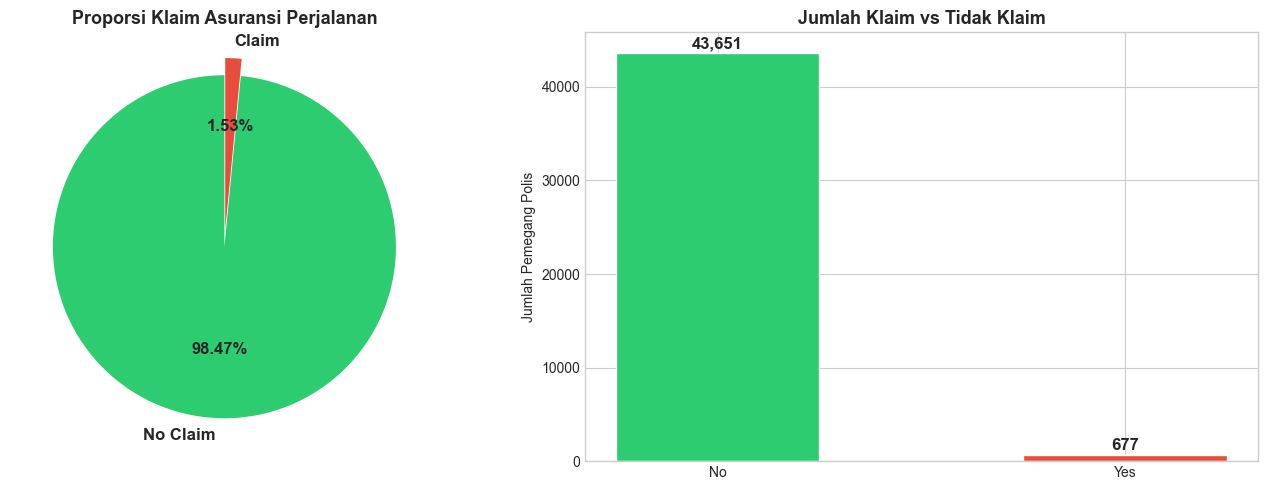

In [22]:
# Distribusi Claim — Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = ['#2ecc71', '#e74c3c']
claim_counts = df['Claim'].value_counts()
axes[0].pie(claim_counts, labels=['No Claim', 'Claim'], autopct='%1.2f%%',
            colors=colors, startangle=90, explode=(0, 0.1),
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0].set_title('Proporsi Klaim Asuransi Perjalanan', fontsize=13, fontweight='bold')

# Bar chart with count labels
bars = axes[1].bar(claim_counts.index, claim_counts.values, color=colors, edgecolor='white', width=0.5)
axes[1].set_title('Jumlah Klaim vs Tidak Klaim', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Jumlah Pemegang Polis')
for bar, count in zip(bars, claim_counts.values):
    axes[1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 200,
                f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

**Insight:**
Dataset menunjukkan imbalance yang sangat ekstrem. Kurang dari 2% pemegang polis yang mengajukan klaim. Ini konsisten dengan industri asuransi perjalanan dimana klaim adalah kejadian langka (*rare event*).

**Business Recommendation:**
- Teknik resampling wajib digunakan dalam pemodelan untuk mencegah model bias terhadap kelas mayoritas
- Perusahaan perlu menerapkan *risk-based pricing*, bukan flat pricing, untuk merefleksikan probabilitas klaim yang sangat rendah namun berdampak besar

### D.2 Analisis per Agency

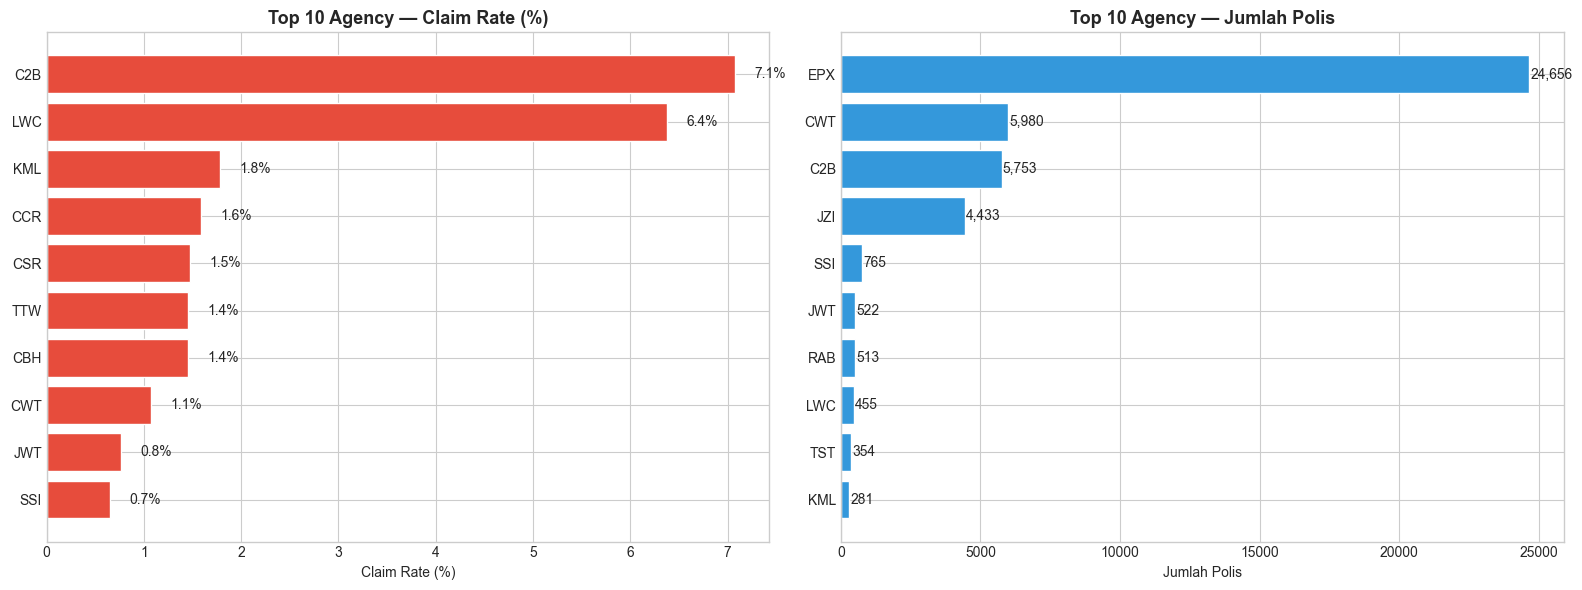

Claim Rate per Agency (Lengkap)

        No_Claim_%  Claim_%  Total_Polis
Agency                                  
C2B          92.93     7.07         5753
LWC          93.63     6.37          455
KML          98.22     1.78          281
CCR          98.41     1.59          126
CSR          98.53     1.47           68
TTW          98.55     1.45           69
CBH          98.55     1.45           69
CWT          98.93     1.07         5980
JWT          99.23     0.77          522
SSI          99.35     0.65          765
TST          99.44     0.56          354
EPX          99.46     0.54        24656
JZI          99.50     0.50         4433
RAB          99.81     0.19          513
ART         100.00     0.00          229
ADM         100.00     0.00           55


In [23]:
# Claim rate per Agency
agency_claim = pd.crosstab(df['Agency'], df['Claim'], normalize='index') * 100
agency_claim.columns = ['No_Claim_%', 'Claim_%']
agency_claim['Total_Polis'] = df['Agency'].value_counts()
agency_claim = agency_claim.sort_values('Claim_%', ascending=False)

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 Agency by Claim Rate
top_10 = agency_claim.head(10)
bars = axes[0].barh(top_10.index, top_10['Claim_%'], color='#e74c3c', edgecolor='white')
axes[0].set_title('Top 10 Agency — Claim Rate (%)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Claim Rate (%)')
for bar, val in zip(bars, top_10['Claim_%']):
    axes[0].text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2.,
                f'{val:.1f}%', va='center', fontsize=10)
axes[0].invert_yaxis()

# Top 10 Agency by Volume
top_vol = agency_claim.sort_values('Total_Polis', ascending=False).head(10)
bars2 = axes[1].barh(top_vol.index, top_vol['Total_Polis'], color='#3498db', edgecolor='white')
axes[1].set_title('Top 10 Agency — Jumlah Polis', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Jumlah Polis')
for bar, val in zip(bars2, top_vol['Total_Polis']):
    axes[1].text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2.,
                f'{val:,.0f}', va='center', fontsize=10)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print('Claim Rate per Agency (Lengkap)\n')
print(agency_claim.to_string())

**Insight:**
Terdapat variasi claim rate yang signifikan antar agency. Beberapa agency memiliki claim rate yang jauh lebih tinggi dari rata-rata, yang mengindikasikan perbedaan profil risiko berdasarkan basis pelanggan masing-masing agen.

**Business Recommendation:**
- Agency dengan claim rate tinggi perlu dievaluasi. Apakah karena jenis destinasi yang berisiko, atau karena *adverse selection* (nasabah berisiko tinggi cenderung membeli dari agen tertentu)
- Pertimbangkan pricing differential berdasarkan agen untuk menyesuaikan premi dengan profil risiko

### D.3 Agency × Agency Type (Airlines vs Travel Agency)

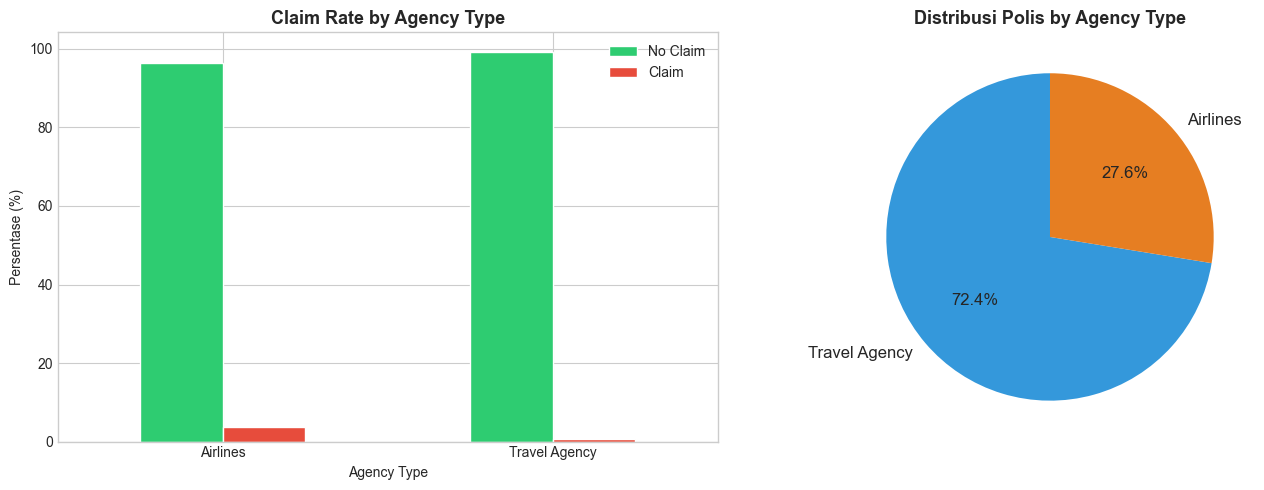

Detail Jenis Agency:

Airlines:
  Total polis: 12,215
  Claim rate: 3.59%

Travel Agency:
  Total polis: 32,113
  Claim rate: 0.74%


In [24]:
# Deep-dive: Agency Type vs Claim
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Claim Rate by Agency Type
agency_type_claim = pd.crosstab(df['Agency Type'], df['Claim'], normalize='index') * 100
agency_type_claim.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], edgecolor='white', rot=0)
axes[0].set_title('Claim Rate by Agency Type', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Persentase (%)')
axes[0].legend(['No Claim', 'Claim'])

# Volume by Agency Type
vol_by_type = df['Agency Type'].value_counts()
axes[1].pie(vol_by_type, labels=vol_by_type.index, autopct='%1.1f%%',
            colors=['#3498db', '#e67e22'], startangle=90,
            textprops={'fontsize': 12})
axes[1].set_title('Distribusi Polis by Agency Type', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print('Detail Jenis Agency:')
for atype in df['Agency Type'].unique():
    subset = df[df['Agency Type'] == atype]
    claim_rate = subset['Claim'].value_counts(normalize=True).get('Yes', 0) * 100
    print(f'\n{atype}:')
    print(f'  Total polis: {len(subset):,}')
    print(f'  Claim rate: {claim_rate:.2f}%')

**Insight:**
Terdapat perbedaan pola risiko antara Airlines dan Travel Agency. Analisis ini mengungkap bahwa tipe bisnis yang berbeda memiliki eksposur risiko yang berbeda pula.

**Business Recommendation:**
- Kembangkan model pricing terpisah atau setidaknya gunakan Agency Type sebagai fitur penting dalam model
- Tim Operasional perlu melakukan audit claim lebih ketat pada tipe agen dengan claim rate lebih tinggi

### D.4 Analisis Produk (Product Name)

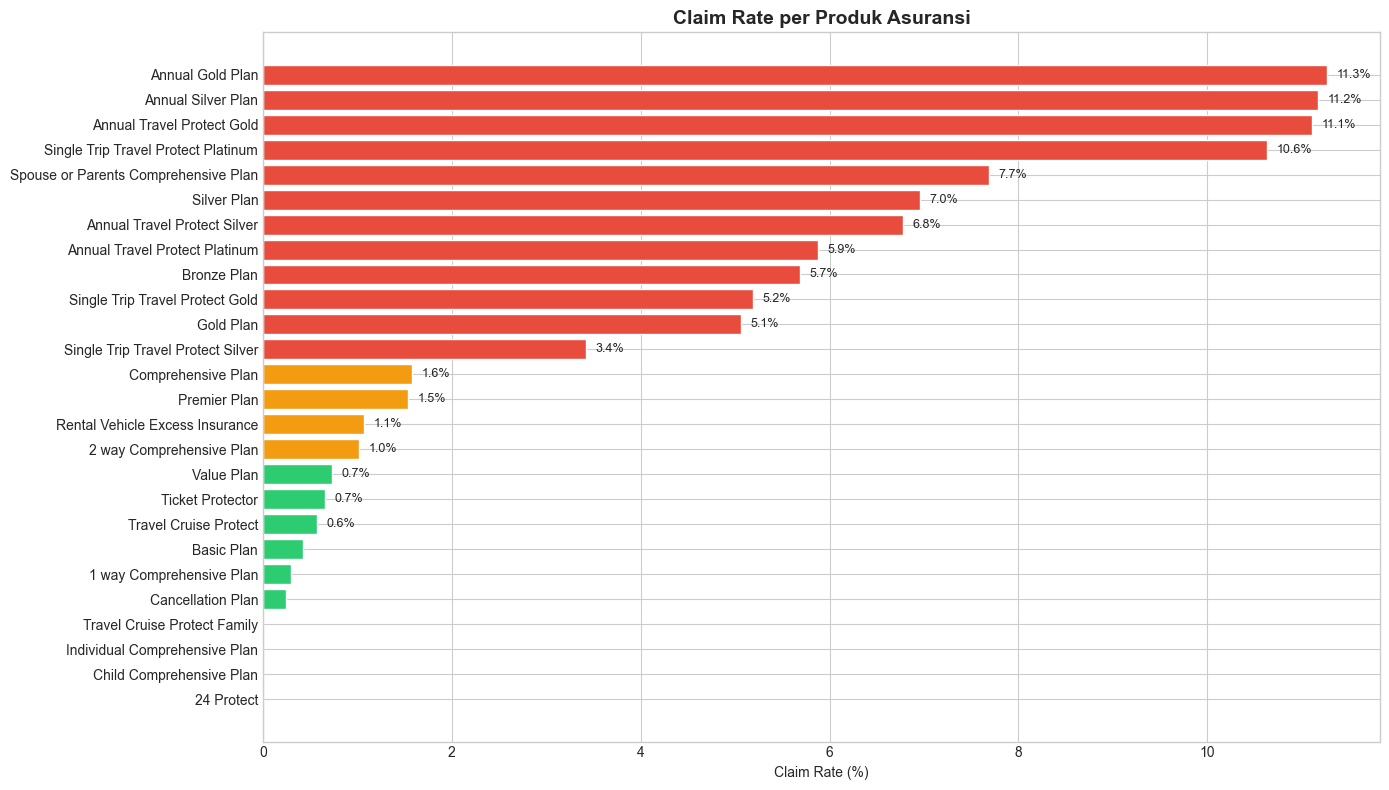

Top 5 Produk dengan Claim Rate Tertinggi:

                                      No_Claim_%  Claim_%  Total_Polis
Product Name                                                          
Annual Gold Plan                           88.73    11.27          142
Annual Silver Plan                         88.82    11.18          975
Annual Travel Protect Gold                 88.89    11.11           63
Single Trip Travel Protect Platinum        89.36    10.64           47
Spouse or Parents Comprehensive Plan       92.31     7.69           13


In [25]:
# Claim rate per Product
product_claim = pd.crosstab(df['Product Name'], df['Claim'], normalize='index') * 100
product_claim['Total'] = df['Product Name'].value_counts()
product_claim.columns = ['No_Claim_%', 'Claim_%', 'Total_Polis']
product_claim = product_claim.sort_values('Claim_%', ascending=True)

# Visualisasi semua produk
fig, ax = plt.subplots(figsize=(14, 8))
colors = ['#e74c3c' if x > 2 else '#f39c12' if x > 1 else '#2ecc71' for x in product_claim['Claim_%']]
bars = ax.barh(product_claim.index, product_claim['Claim_%'], color=colors, edgecolor='white')
ax.set_title('Claim Rate per Produk Asuransi', fontsize=14, fontweight='bold')
ax.set_xlabel('Claim Rate (%)')

for bar, val in zip(bars, product_claim['Claim_%']):
    if val > 0.5:
        ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2.,
                f'{val:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Top 5
print('Top 5 Produk dengan Claim Rate Tertinggi:\n')
print(product_claim.sort_values('Claim_%', ascending=False).head().to_string())

**Insight:**
Terdapat perbedaan claim rate yang sangat besar antar produk — beberapa produk memiliki claim rate mendekati 0%, sementara yang lain bisa mencapai >5%. Ini menunjukkan bahwa jenis produk adalah prediktor kuat untuk klaim.

**Business Recommendation:**
- Produk dengan claim rate tinggi perlu di-review: apakah premi sudah mencerminkan risiko? Apakah *coverage* terlalu luas?
- Pertimbangkan re-design produk atau penyesuaian premi untuk produk berisiko tinggi

### D.5 Analisis Distribution Channel (Online vs Offline)

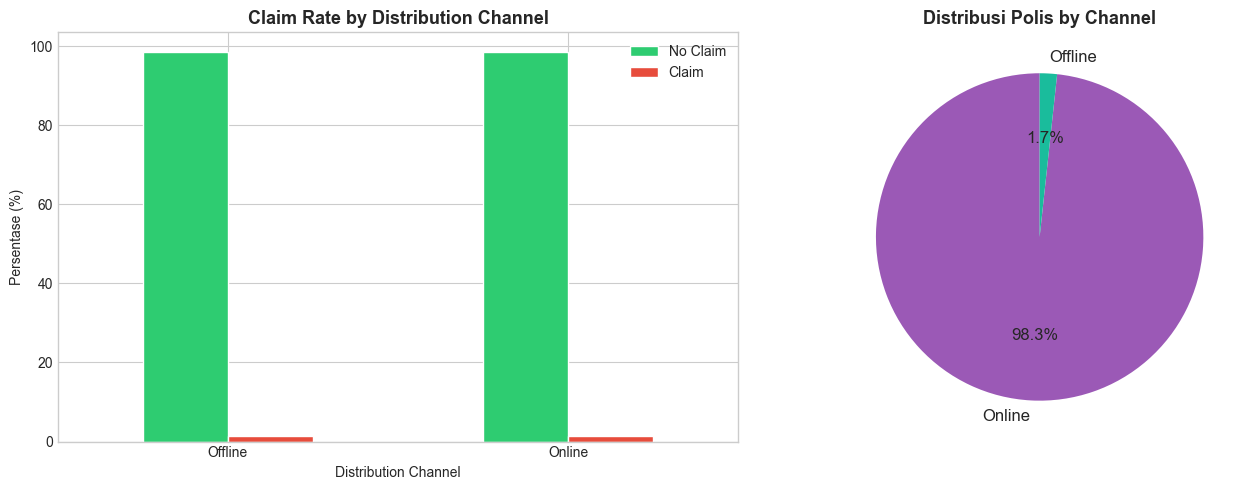

In [26]:
# Distribution Channel vs Claim
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Claim Rate
channel_claim = pd.crosstab(df['Distribution Channel'], df['Claim'], normalize='index') * 100
channel_claim.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], edgecolor='white', rot=0)
axes[0].set_title('Claim Rate by Distribution Channel', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Persentase (%)')
axes[0].legend(['No Claim', 'Claim'])

# Volume
channel_vol = df['Distribution Channel'].value_counts()
axes[1].pie(channel_vol, labels=channel_vol.index, autopct='%1.1f%%',
            colors=['#9b59b6', '#1abc9c'], startangle=90,
            textprops={'fontsize': 12})
axes[1].set_title('Distribusi Polis by Channel', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

**Insight:**
Perbandingan channel Online vs Offline memberikan gambaran tentang bagaimana cara pembelian polis memengaruhi kemungkinan klaim.

**Business Recommendation:**
- Jika terdapat perbedaan claim rate signifikan antar channel, pertimbangkan penyesuaian proses underwriting yang berbeda untuk masing-masing channel

### D.6 Analisis Destinasi

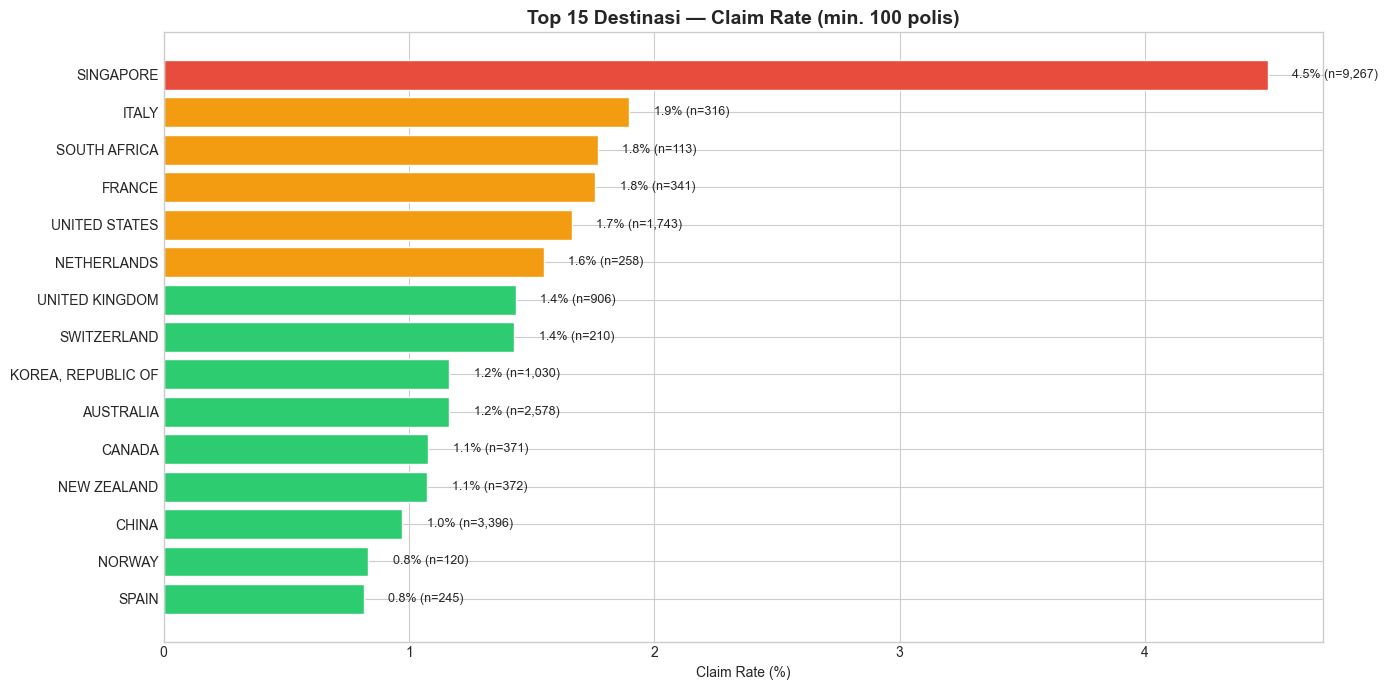

In [27]:
# Top 15 Destination by Claim Rate (minimal 100 polis)
dest_claim = pd.crosstab(df['Destination'], df['Claim'], normalize='index') * 100
dest_claim['Total'] = df['Destination'].value_counts()
dest_claim.columns = ['No_Claim_%', 'Claim_%', 'Total_Polis']

# Filter minimal 100 polis untuk signifikansi statistik
dest_filtered = dest_claim[dest_claim['Total_Polis'] >= 100].sort_values('Claim_%', ascending=False)

fig, ax = plt.subplots(figsize=(14, 7))
top_dest = dest_filtered.head(15)
colors_dest = ['#e74c3c' if x > 3 else '#f39c12' if x > 1.5 else '#2ecc71' for x in top_dest['Claim_%']]
bars = ax.barh(top_dest.index, top_dest['Claim_%'], color=colors_dest, edgecolor='white')
ax.set_title('Top 15 Destinasi — Claim Rate (min. 100 polis)', fontsize=14, fontweight='bold')
ax.set_xlabel('Claim Rate (%)')

for bar, val, total in zip(bars, top_dest['Claim_%'], top_dest['Total_Polis']):
    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2.,
            f'{val:.1f}% (n={total:,.0f})', va='center', fontsize=9)

ax.invert_yaxis()
plt.tight_layout()
plt.show()

**Insight:**
Destinasi tertentu menunjukkan claim rate yang lebih tinggi. Ini bisa disebabkan oleh faktor seperti risiko kesehatan di negara tujuan, jarak tempuh, atau durasi perjalanan tipikal ke destinasi tersebut.

**Business Recommendation:**
- Buat risk scoring berdasarkan destinasi. Destinasi berisiko tinggi mendapat premi yang lebih tinggi
- Sertakan informasi peringatan perjalanan (travel advisory) dalam proses underwriting otomatis

### D.7 Fitur Numerik vs Claim

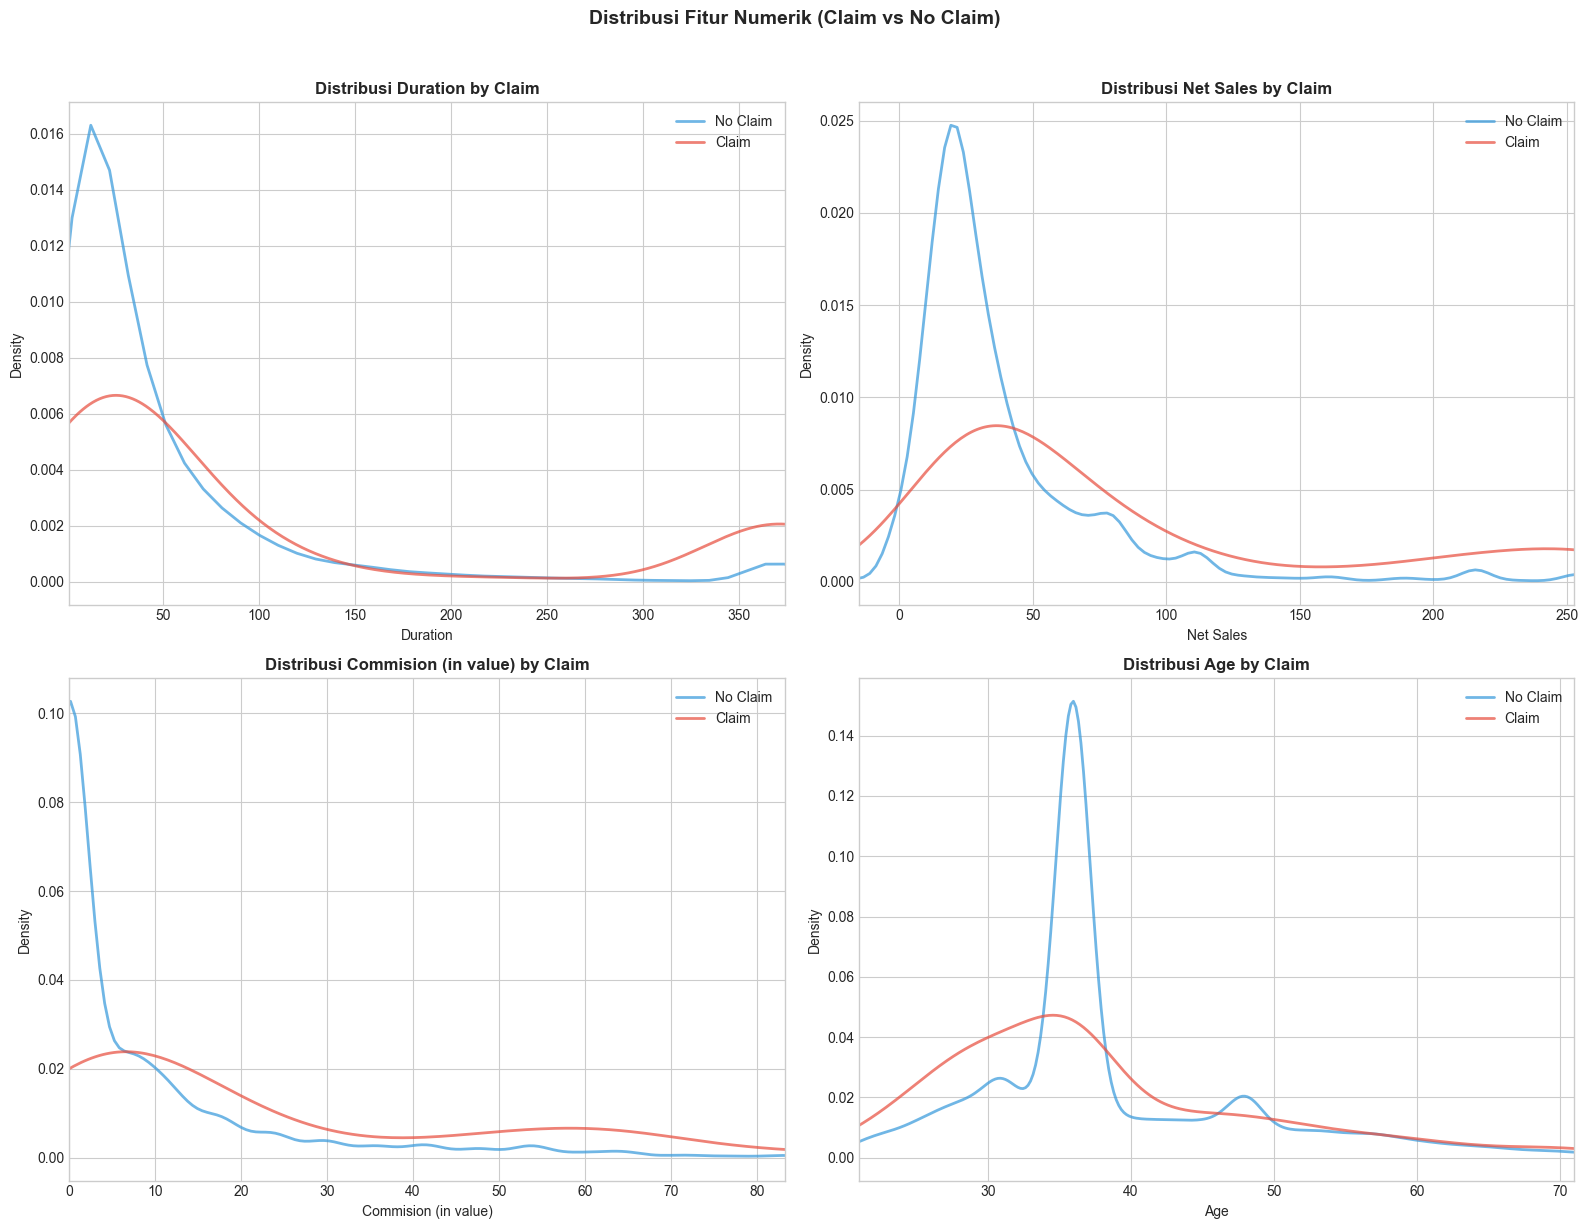

In [28]:
# Distribusi fitur numerik berdasarkan Claim
num_features_eda = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(num_features_eda):
    # KDE plot
    for claim_val, color, label in [('No', '#3498db', 'No Claim'), ('Yes', '#e74c3c', 'Claim')]:
        data = df[df['Claim'] == claim_val][col]
        data.plot.kde(ax=axes[i], color=color, label=label, linewidth=2, alpha=0.7)
    
    axes[i].set_title(f'Distribusi {col} by Claim', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].legend()
    axes[i].set_xlim(df[col].quantile(0.01), df[col].quantile(0.99))

plt.suptitle('Distribusi Fitur Numerik (Claim vs No Claim)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [29]:
# Statistik numerik berdasarkan Claim
print('Statistik Numerik berdasarkan Status Klaim :\n')
for col in num_features_eda:
    print(f'{col}:')
    stats_by_claim = df.groupby('Claim')[col].describe()[['mean', '50%', 'std']].round(2)
    stats_by_claim.columns = ['Mean', 'Median', 'Std Dev']
    print(stats_by_claim.to_string())
    print()

Statistik Numerik berdasarkan Status Klaim :

Duration:
        Mean  Median  Std Dev
Claim                        
No     48.53   22.00   108.36
Yes   106.77   35.00   140.31

Net Sales:
       Mean  Median  Std Dev
Claim                       
No    39.73   26.00    47.19
Yes   93.56   51.00    92.77

Commision (in value):
       Mean  Median  Std Dev
Claim                       
No     9.46    0.00    19.26
Yes   25.92   12.13    32.36

Age:
       Mean  Median  Std Dev
Claim                       
No    38.69   36.00    10.00
Yes   37.71   36.00    11.52



**Insight:**
- **Duration**: Pemegang polis yang mengklaim cenderung memiliki durasi perjalanan yang lebih panjang. Logis karena semakin lama perjalanan, semakin tinggi eksposur risiko
- **Net Sales & Commission**: Polis dengan nilai lebih tinggi mungkin memiliki coverage yang lebih luas, sehingga lebih mudah memenuhi syarat klaim
- **Age**: Distribusi usia antara yang klaim dan tidak klaim perlu dicermati lebih lanjut

**Business Recommendation:**
- Implementasikan duration-based risk tiers. Perjalanan >90 hari mendapat assessment risiko tambahan
- Review ulang produk dengan Net Sales tinggi apakah coverage-nya proporsional dengan premi

### D.8 Multivariate Analysis - Correlation Heatmap

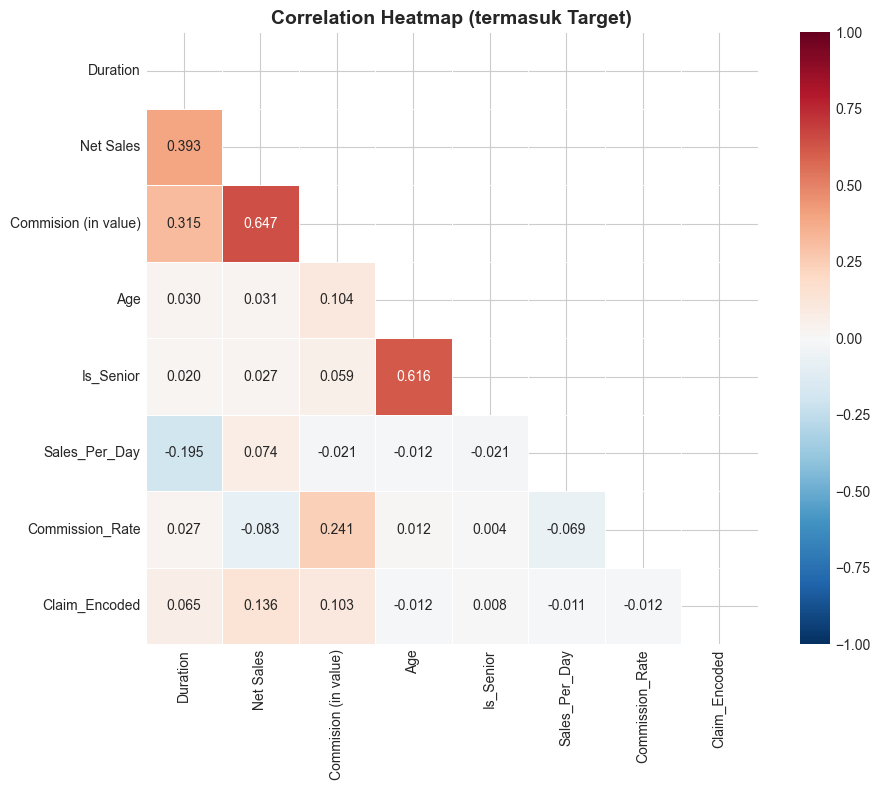


Korelasi Fitur dengan Claim :
Net Sales: 0.1357 ↑
Commision (in value): 0.1029 ↑
Duration: 0.0654 ↑
Is_Senior: 0.0076 ↑
Sales_Per_Day: -0.0115 ↓
Commission_Rate: -0.0116 ↓
Age: -0.0119 ↓


In [30]:
# Encode Claim sementara untuk korelasi
df_corr = df.copy()
df_corr['Claim_Encoded'] = (df_corr['Claim'] == 'Yes').astype(int)

num_for_corr = ['Duration', 'Net Sales', 'Commision (in value)', 'Age', 
                'Is_Senior', 'Sales_Per_Day', 'Commission_Rate', 'Claim_Encoded']

plt.figure(figsize=(10, 8))
corr = df_corr[num_for_corr].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.3f', cmap='RdBu_r',
            center=0, linewidths=0.5, square=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap (termasuk Target)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Korelasi dengan target
print('\nKorelasi Fitur dengan Claim :')
claim_corr = corr['Claim_Encoded'].drop('Claim_Encoded').sort_values(ascending=False)
for feat, val in claim_corr.items():
    direction = '↑' if val > 0 else '↓'
    print(f'{feat}: {val:.4f} {direction}')

del df_corr

### D.9 EDA Summary

#### Rangkuman Temuan Utama

| No | Temuan | Implikasi Bisnis |
|:---:|:---|:---|
| 1 | Dataset sangat imbalanced (~98.5% vs ~1.5%) | Teknik resampling wajib digunakan dalam modeling |
| 2 | Claim rate bervariasi signifikan antar Agency | Pertimbangkan risk-based pricing per agen |
| 3 | Tipe agen (Airlines vs Travel Agency) mempengaruhi profil risiko | Segmentasi model atau fitur per tipe agen |
| 4 | Beberapa produk memiliki claim rate jauh di atas rata-rata | Re-pricing atau re-design produk berisiko tinggi |
| 5 | Destinasi tertentu lebih berisiko | Implementasi destination risk scoring |
| 6 | Durasi perjalanan berkorelasi dengan klaim | Duration-based risk tiers untuk assessment |
| 7 | Korelasi fitur numerik dengan target umumnya rendah | Model tree-based kemungkinan akan outperform model linear |

---
## E. MACHINE LEARNING / ANALYTICS

Pada bagian ini, kita akan membangun model prediktif melalui tahapan yang sistematis:
1. **Data Preparation**: Encoding, splitting, preprocessing pipeline
2. **Multikolinearitas Check**: VIF analysis
3. **Resampling Experiments**: 3 strategi (ROS, RUS, SMOTE+Tomek)
4. **Model Benchmarking**: 6 algoritma × 4 skenario (tanpa + 3 resampling)
5. **Hyperparameter Tuning**: Optimasi model terbaik
6. **Final Evaluation**: Confusion Matrix, ROC, SHAP

### E.1 Encode Target Variable

In [31]:
# Encode Claim: Yes → 1, No → 0
le = LabelEncoder()
df['Claim'] = le.fit_transform(df['Claim'])

print('Encoding Target Variable:')
print(f'  No  → 0')
print(f'  Yes → 1')
print(f'\nDistribusi setelah encoding:')
print(df['Claim'].value_counts())
print(f'\nProporsi kelas 1 (Claim): {df["Claim"].mean()*100:.2f}%')

Encoding Target Variable:
  No  → 0
  Yes → 1

Distribusi setelah encoding:
Claim
0    43651
1      677
Name: count, dtype: int64

Proporsi kelas 1 (Claim): 1.53%


### E.2 Train-Test Split

In [32]:
# Pisahkan fitur dan target
X = df.drop('Claim', axis=1)
y = df['Claim']

# Hapus kolom yang tidak akan digunakan sebagai fitur
# Duration_Category sudah di-encode secara terpisah
cols_to_drop = ['Duration_Category']
X = X.drop(cols_to_drop, axis=1, errors='ignore')

# Stratified Train-Test Split (80/20)
# Stratified memastikan proporsi kelas yang sama di train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print('Train-Test Split (Stratified 80/20):\n')
print(f'Training set : {X_train.shape[0]:,} sampel ({X_train.shape[0]/len(X)*100:.0f}%)')
print(f'Test set     : {X_test.shape[0]:,} sampel ({X_test.shape[0]/len(X)*100:.0f}%)')
print(f'\nDistribusi target di Training:')
print(f'No Claim (0): {(y_train==0).sum():,} ({(y_train==0).mean()*100:.2f}%)')
print(f'Claim (1)   : {(y_train==1).sum():,} ({(y_train==1).mean()*100:.2f}%)')
print(f'\nDistribusi target di Test:')
print(f'No Claim (0): {(y_test==0).sum():,} ({(y_test==0).mean()*100:.2f}%)')
print(f'Claim (1)   : {(y_test==1).sum():,} ({(y_test==1).mean()*100:.2f}%)')

Train-Test Split (Stratified 80/20):

Training set : 35,462 sampel (80%)
Test set     : 8,866 sampel (20%)

Distribusi target di Training:
No Claim (0): 34,920 (98.47%)
Claim (1)   : 542 (1.53%)

Distribusi target di Test:
No Claim (0): 8,731 (98.48%)
Claim (1)   : 135 (1.52%)


### E.3 Preprocessing Pipeline

Menggunakan `ColumnTransformer` untuk menangani fitur numerik dan kategorikal secara berbeda:

| Tipe Fitur | Metode | Alasan |
|:---|:---|:---|
| **Numerik** | `RobustScaler` | Robust terhadap outlier (menggunakan IQR, bukan mean/std) |
| **Kategorikal** | `OneHotEncoder` | Mengubah kategori menjadi variabel biner tanpa asumsi ordinalitas |

In [33]:
# Identifikasi kolom berdasarkan tipe
num_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()

print(f'Fitur Numerik ({len(num_features)}): {num_features}')
print(f'Fitur Kategorikal ({len(cat_features)}): {cat_features}')

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
    ],
    remainder='passthrough'
)

Fitur Numerik (7): ['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Is_Senior', 'Sales_Per_Day', 'Commission_Rate']
Fitur Kategorikal (5): ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']


### E.4 Multikolinearitas - VIF (Variance Inflation Factor)

VIF mengukur seberapa besar varians koefisien regresi meningkat karena korelasi antar prediktor. Aturan umum:
- **VIF < 5**: Tidak ada multikolinearitas signifikan
- **VIF 5-10**: Multikolinearitas moderat
- **VIF > 10**: Multikolinearitas tinggi. Perlu penanganan

VIF (Variance Inflation Factor) :

Commision (in value)     : VIF =     2.38  Ok
Net Sales                : VIF =     2.33  Ok
Age                      : VIF =     1.73  Ok
Is_Senior                : VIF =     1.69  Ok
Duration                 : VIF =     1.34  Ok
Commission_Rate          : VIF =     1.22  Ok
Sales_Per_Day            : VIF =     1.07  Ok


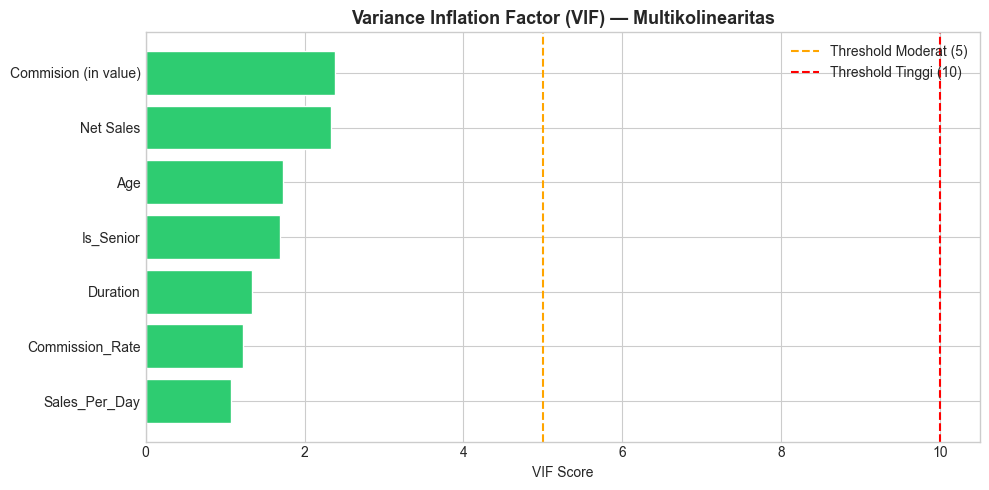

In [34]:
# Hitung VIF pada fitur numerik setelah scaling
from sklearn.preprocessing import RobustScaler as RS

# Scale fitur numerik
scaler = RS()
X_train_num_scaled = pd.DataFrame(
    scaler.fit_transform(X_train[num_features]),
    columns=num_features,
    index=X_train.index
)

# Hitung VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = num_features
vif_data['VIF'] = [
    variance_inflation_factor(X_train_num_scaled.values, i)
    for i in range(len(num_features))
]
vif_data = vif_data.sort_values('VIF', ascending=False)

print('VIF (Variance Inflation Factor) :\n')
for _, row in vif_data.iterrows():
    status = 'Tinggi' if row['VIF'] > 10 else 'Sedang' if row['VIF'] > 5 else 'Ok'
    print(f"{row['Feature']:25s}: VIF = {row['VIF']:8.2f}  {status}")

# Visualisasi
fig, ax = plt.subplots(figsize=(10, 5))
colors_vif = ['#e74c3c' if v > 10 else '#f39c12' if v > 5 else '#2ecc71' for v in vif_data['VIF']]
bars = ax.barh(vif_data['Feature'], vif_data['VIF'], color=colors_vif, edgecolor='white')
ax.axvline(x=5, color='orange', linestyle='--', linewidth=1.5, label='Threshold Moderat (5)')
ax.axvline(x=10, color='red', linestyle='--', linewidth=1.5, label='Threshold Tinggi (10)')
ax.set_title('Variance Inflation Factor (VIF) — Multikolinearitas', fontsize=13, fontweight='bold')
ax.set_xlabel('VIF Score')
ax.legend()
ax.invert_yaxis()
plt.tight_layout()
plt.show()

**Insight VIF:**
> Multikolinearitas pada fitur numerik dimonitor untuk memastikan bahwa model linear (Logistic Regression) tidak terganggu. Untuk model tree-based (XGBoost, LightGBM, Random Forest), multikolinearitas tidak menjadi masalah karena mereka memilih fitur secara independen di setiap split.
>
> Jika ada fitur dengan VIF sangat tinggi (>10), kita tetap mempertahankannya karena mayoritas model yang kita gunakan adalah tree-based.

### E.5 Imbalance Visualization

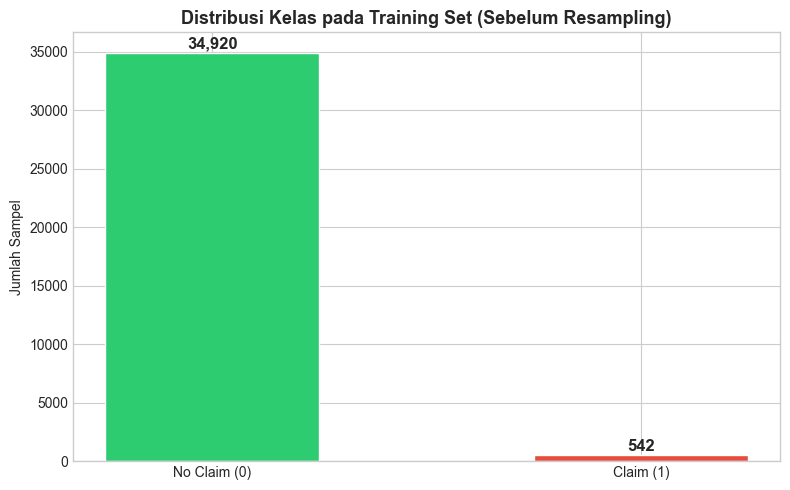

Rasio imbalance: 1 : 64


In [35]:
# Visualisasi imbalance pada training set
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#2ecc71', '#e74c3c']
labels = ['No Claim (0)', 'Claim (1)']
counts = [int((y_train==0).sum()), int((y_train==1).sum())]

bars = ax.bar(labels, counts, color=colors, edgecolor='white', width=0.5)
for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 100,
            f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=12)

ax.set_title('Distribusi Kelas pada Training Set (Sebelum Resampling)', fontsize=13, fontweight='bold')
ax.set_ylabel('Jumlah Sampel')
plt.tight_layout()
plt.show()

print(f'Rasio imbalance: 1 : {counts[0]//counts[1]}')

### E.6 Eksperimen Resampling

Untuk mengatasi imbalance yang ekstrem, kita menguji 5 strategi resampling dengan pendekatan yang berbeda:

| Strategi | Deskripsi | Pendekatan |
|:---|:---|:---|
| **No Resampling** | Baseline tanpa modifikasi distribusi | Kontrol |
| **Random Over Sampling (ROS)** | Duplikasi sampel minoritas secara acak | Over-sampling |
| **SMOTE** | Membuat sampel sintetis dari kelas minoritas menggunakan interpolasi k-nearest neighbors | Over-sampling (sintetis) |
| **Random Under Sampling (RUS)** | Mengurangi sampel mayoritas secara acak | Under-sampling |
| **SMOTE + Tomek Links** | Kombinasi SMOTE (over-sampling sintetis) kemudian Tomek Links (membersihkan sampel borderline) | Hybrid |

Mengapa kita menguji beberapa teknik? Setiap teknik resampling memiliki trade-off. ROS dapat menyebabkan overfitting karena duplikasi data yang identik. SMOTE mengatasi hal ini dengan membuat sampel sintetis, namun bisa menciptakan noise jika data minoritas tumpang tindih dengan mayoritas. RUS kehilangan informasi dari kelas mayoritas. Hybrid (SMOTE + Tomek) berusaha mengambil keuntungan dari kedua pendekatan sekaligus membersihkan noise di perbatasan kelas.

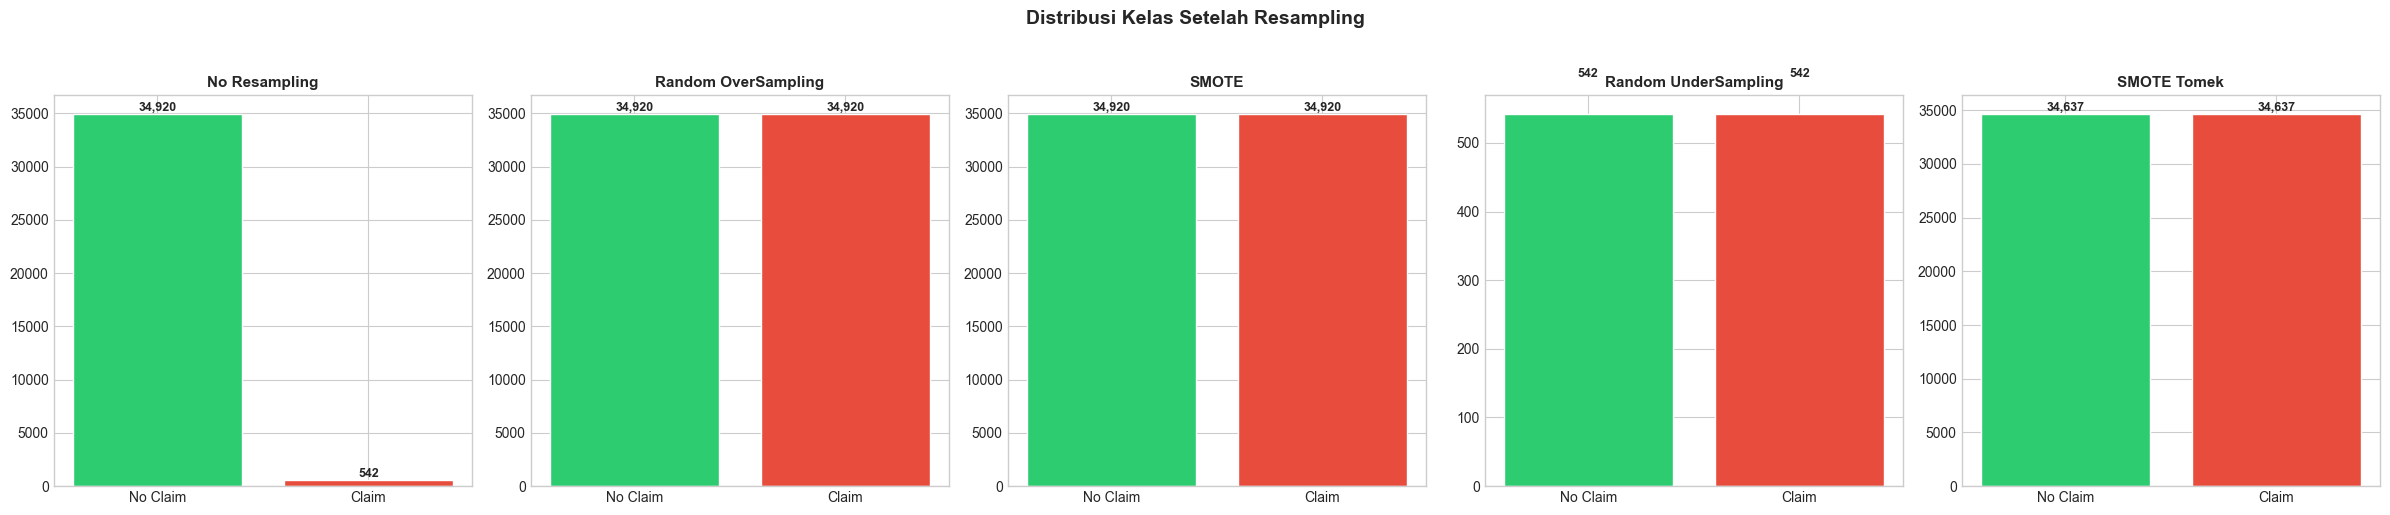

In [36]:
# Definisi 5 strategi resampling
resamplers = {
    'No_Resampling': None,
    'Random_OverSampling': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'Random_UnderSampling': RandomUnderSampler(random_state=42),
    'SMOTE_Tomek': SMOTETomek(random_state=42)
}

# Visualisasi distribusi setelah resampling (pada data terpreproses)
fig, axes = plt.subplots(1, 5, figsize=(24, 5))

for i, (name, resampler) in enumerate(resamplers.items()):
    if resampler is None:
        X_res, y_res = X_train[num_features].values, y_train.values
    else:
        # Hanya gunakan fitur numerik untuk demo visualisasi
        X_res, y_res = resampler.fit_resample(X_train[num_features], y_train)
    
    counts_res = [int((y_res==0).sum()), int((y_res==1).sum())]
    bars = axes[i].bar(['No Claim', 'Claim'], counts_res, color=['#2ecc71', '#e74c3c'], edgecolor='white')
    axes[i].set_title(name.replace('_', ' '), fontsize=11, fontweight='bold')
    for bar, count in zip(bars, counts_res):
        axes[i].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 50,
                    f'{count:,}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.suptitle('Distribusi Kelas Setelah Resampling', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### E.7 Model Selection & Reasoning

Kita memilih 6 algoritma dengan alasan teknis yang kuat:

| Model | Alasan Pemilihan |
|:---|:---|
| **Logistic Regression** | Baseline linear: cepat, interpretable, cocok untuk memahami hubungan linear |
| **Decision Tree** | Baseline non-linear: mudah dipahami, mampu menangkap interaksi fitur |
| **Random Forest** | Ensemble bagging: mengurangi overfitting dari Decision Tree, robust |
| **Gradient Boosting** | Ensemble boosting: sequential learning yang kuat untuk mengoreksi kesalahan |
| **XGBoost** | Optimized gradient boosting: native handling untuk data sparse, regularisasi L1/L2 bawaan, sangat efisien |
| **LightGBM** | Gradient boosting yang cepat: histogram-based splitting, efisien untuk high-cardinality categorical features |

### E.8 Benchmark: Model × Resampling

Menguji semua kombinasi model × resampling menggunakan 5-Fold Stratified Cross-Validation dengan F2-Score sebagai metrik utama.

In [37]:
# Custom F2-Score scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Definisi model
models = {
    'Logistic_Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision_Tree': DecisionTreeClassifier(random_state=42),
    'Random_Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient_Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss',
                              use_label_encoder=False, verbosity=0),
    'LightGBM': lgb.LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)
}

# Cross-validation untuk semua kombinasi
print('Benchmark: Model × Resampling (5-Fold CV)')
print('Metrik: F2-Score\n')

results = []

for resamp_name, resampler in resamplers.items():
    for model_name, model in models.items():
        # Buat pipeline
        if resampler is not None:
            pipeline = ImbPipeline([
                ('preprocessor', preprocessor),
                ('resampler', resampler),
                ('model', model)
            ])
        else:
            pipeline = Pipeline([
                ('preprocessor', preprocessor),
                ('model', model)
            ])
        
        # Cross-validate
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_results = cross_validate(
            pipeline, X_train, y_train,
            cv=cv, scoring={
                'f2': f2_scorer,
                'recall': 'recall',
                'precision': 'precision',
                'roc_auc': 'roc_auc'
            },
            n_jobs=-1
        )
        
        results.append({
            'Model': model_name,
            'Resampling': resamp_name,
            'F2_mean': cv_results['test_f2'].mean(),
            'F2_std': cv_results['test_f2'].std(),
            'Recall_mean': cv_results['test_recall'].mean(),
            'Precision_mean': cv_results['test_precision'].mean(),
            'ROC_AUC_mean': cv_results['test_roc_auc'].mean()
        })
        
        print(f'{resamp_name:25s} | {model_name:22s} | F2={cv_results["test_f2"].mean():.4f} (±{cv_results["test_f2"].std():.4f})')

# Buat DataFrame hasil
exp_df = pd.DataFrame(results).sort_values('F2_mean', ascending=False).reset_index(drop=True)
print(f'\nBenchmark selesai: {len(results)} kombinasi diuji')

Benchmark: Model × Resampling (5-Fold CV)
Metrik: F2-Score

No_Resampling             | Logistic_Regression    | F2=0.0000 (±0.0000)
No_Resampling             | Decision_Tree          | F2=0.0601 (±0.0302)
No_Resampling             | Random_Forest          | F2=0.0132 (±0.0082)
No_Resampling             | Gradient_Boosting      | F2=0.0045 (±0.0056)
No_Resampling             | XGBoost                | F2=0.0046 (±0.0092)
No_Resampling             | LightGBM               | F2=0.0000 (±0.0000)
Random_OverSampling       | Logistic_Regression    | F2=0.2088 (±0.0111)
Random_OverSampling       | Decision_Tree          | F2=0.0621 (±0.0195)
Random_OverSampling       | Random_Forest          | F2=0.0562 (±0.0157)
Random_OverSampling       | Gradient_Boosting      | F2=0.2116 (±0.0087)
Random_OverSampling       | XGBoost                | F2=0.2025 (±0.0141)
Random_OverSampling       | LightGBM               | F2=0.2155 (±0.0139)
SMOTE                     | Logistic_Regression    | F2=0.2014 (

In [38]:
# Tabel Top 10 kombinasi terbaik
print('Top 10 Kombinasi Terbaik (F2-Score) :\n')
top10 = exp_df.head(10)[['Model', 'Resampling', 'F2_mean', 'F2_std', 'Recall_mean', 'Precision_mean', 'ROC_AUC_mean']]
top10.columns = ['Model', 'Resampling', 'F2 (Mean)', 'F2 (Std)', 'Recall', 'Precision', 'ROC-AUC']
print(top10.to_string(index=False, float_format='%.4f'))

Top 10 Kombinasi Terbaik (F2-Score) :

              Model           Resampling  F2 (Mean)  F2 (Std)  Recall  Precision  ROC-AUC
  Gradient_Boosting                SMOTE     0.2428    0.0120  0.6070     0.0716   0.8210
  Gradient_Boosting          SMOTE_Tomek     0.2417    0.0128  0.6033     0.0713   0.8215
           LightGBM  Random_OverSampling     0.2155    0.0139  0.5056     0.0654   0.7964
  Gradient_Boosting  Random_OverSampling     0.2116    0.0087  0.6623     0.0569   0.8209
Logistic_Regression  Random_OverSampling     0.2088    0.0111  0.7178     0.0544   0.8135
           LightGBM          SMOTE_Tomek     0.2056    0.0127  0.3044     0.0901   0.8068
            XGBoost  Random_OverSampling     0.2025    0.0141  0.3838     0.0702   0.7695
Logistic_Regression Random_UnderSampling     0.2024    0.0083  0.7417     0.0518   0.8250
           LightGBM                SMOTE     0.2023    0.0205  0.2989     0.0886   0.8043
Logistic_Regression                SMOTE     0.2014    0.0103

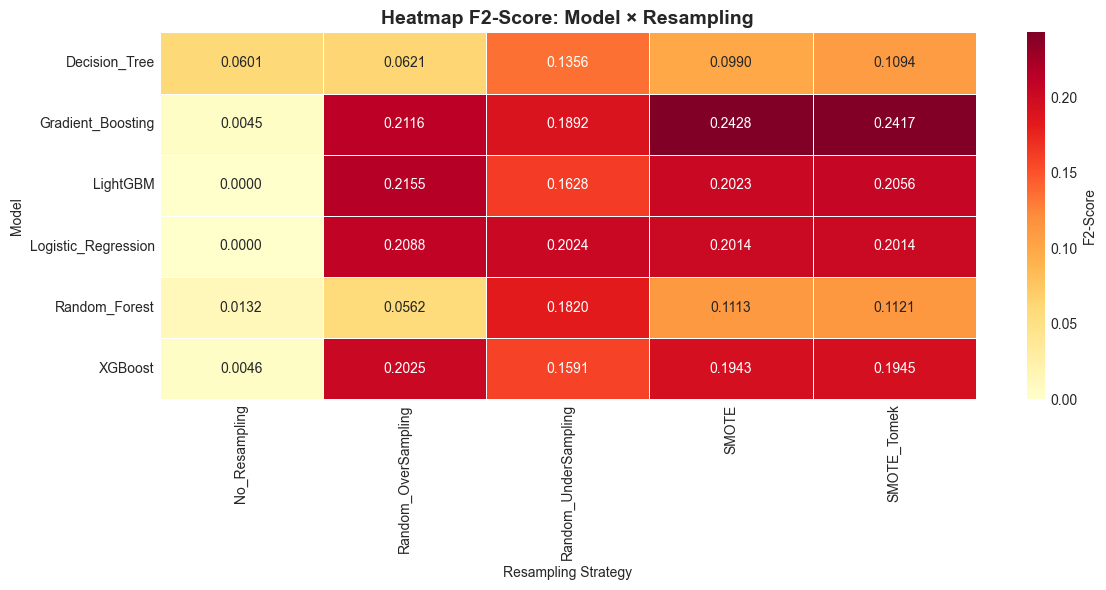

In [39]:
# Heatmap perbandingan F2-Score: Model × Resampling
pivot = exp_df.pivot(index='Model', columns='Resampling', values='F2_mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='.4f', cmap='YlOrRd', linewidths=0.5,
            cbar_kws={'label': 'F2-Score'})
plt.title('Heatmap F2-Score: Model × Resampling', fontsize=14, fontweight='bold')
plt.xlabel('Resampling Strategy')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

**Insight Benchmarking:**
> Dari heatmap di atas, kita dapat melihat kombinasi model + resampling mana yang menghasilkan F2-Score tertinggi. Model tree-based (XGBoost, LightGBM, Random Forest) umumnya superior untuk kasus imbalanced data berkat kemampuan mereka menangkap non-linear patterns.
>
> Resampling memberikan peningkatan signifikan dibandingkan tanpa resampling, terutama dalam hal Recall — yang krusial untuk mendeteksi klaim. Teknik resampling yang menunjukkan performa paling stabil (F2-Score tertinggi dengan standar deviasi terendah) menjadi pilihan utama untuk tahap Hyperparameter Tuning selanjutnya.

### E.9 Hyperparameter Tuning

Berdasarkan benchmark, kita memilih **kombinasi terbaik** dan melakukan optimasi hyperparameter menggunakan `RandomizedSearchCV`.

In [40]:
# Pilih kombinasi terbaik dari benchmark
best_row = exp_df.iloc[0]
best_model_name = best_row['Model']
best_resamp_name = best_row['Resampling']

print(f'Kombinasi Terbaik dari Benchmark :')
print(f'  Model     : {best_model_name}')
print(f'  Resampling: {best_resamp_name}')
print(f'  F2-Score  : {best_row["F2_mean"]:.4f} (±{best_row["F2_std"]:.4f})')

Kombinasi Terbaik dari Benchmark :
  Model     : Gradient_Boosting
  Resampling: SMOTE
  F2-Score  : 0.2428 (±0.0120)


In [41]:
# Hyperparameter search space
from scipy.stats import uniform, randint

param_grids = {
    'XGBoost': {
        'model__n_estimators': randint(100, 500),
        'model__max_depth': randint(3, 10),
        'model__learning_rate': uniform(0.01, 0.3),
        'model__subsample': uniform(0.6, 0.4),
        'model__colsample_bytree': uniform(0.6, 0.4),
        'model__min_child_weight': randint(1, 10),
        'model__gamma': uniform(0, 0.5),
        'model__reg_alpha': uniform(0, 1),
        'model__reg_lambda': uniform(0, 1),
    },
    'LightGBM': {
        'model__n_estimators': randint(100, 500),
        'model__max_depth': randint(3, 10),
        'model__learning_rate': uniform(0.01, 0.3),
        'model__subsample': uniform(0.6, 0.4),
        'model__colsample_bytree': uniform(0.6, 0.4),
        'model__min_child_samples': randint(5, 50),
        'model__reg_alpha': uniform(0, 1),
        'model__reg_lambda': uniform(0, 1),
        'model__num_leaves': randint(20, 100),
    },
    'Random_Forest': {
        'model__n_estimators': randint(100, 500),
        'model__max_depth': randint(5, 30),
        'model__min_samples_split': randint(2, 20),
        'model__min_samples_leaf': randint(1, 10),
        'model__max_features': ['sqrt', 'log2', None],
    },
    'Gradient_Boosting': {
        'model__n_estimators': randint(100, 500),
        'model__max_depth': randint(3, 10),
        'model__learning_rate': uniform(0.01, 0.3),
        'model__subsample': uniform(0.6, 0.4),
        'model__min_samples_split': randint(2, 20),
    },
    'Decision_Tree': {
        'model__max_depth': randint(3, 20),
        'model__min_samples_split': randint(2, 20),
        'model__min_samples_leaf': randint(1, 10),
    },
    'Logistic_Regression': {
        'model__C': uniform(0.01, 10),
        'model__penalty': ['l2'],
    }
}

# Build pipeline untuk tuning
best_model = models[best_model_name]
best_resampler = resamplers[best_resamp_name]

if best_resampler is not None:
    tuning_pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('resampler', best_resampler),
        ('model', best_model)
    ])
else:
    tuning_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', best_model)
    ])

# Jalankan RandomizedSearchCV
param_grid = param_grids.get(best_model_name, {})

if param_grid:
    search = RandomizedSearchCV(
        tuning_pipeline,
        param_distributions=param_grid,
        n_iter=50,
        scoring=f2_scorer,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        random_state=42,
        n_jobs=-1,
        verbose=0
    )
    
    print('Hyperparameter Tuning dijalankan (50 iterasi)...')
    search.fit(X_train, y_train)
    
    print(f'\nBest Parameters:')
    for param, value in search.best_params_.items():
        print(f'{param}: {value}')
    print(f'\nBest F2-Score (CV): {search.best_score_:.4f}')
else:
    # Jika tidak ada param grid, train langsung
    print('Tidak ada hyperparameter grid untuk model ini, menggunakan default.')
    tuning_pipeline.fit(X_train, y_train)
    search = type('obj', (object,), {'best_estimator_': tuning_pipeline, 'best_score_': best_row['F2_mean']})()

Hyperparameter Tuning dijalankan (50 iterasi)...

Best Parameters:
model__learning_rate: 0.03885296532742623
model__max_depth: 3
model__min_samples_split: 2
model__n_estimators: 227
model__subsample: 0.8071005402109921

Best F2-Score (CV): 0.2421


In [42]:
# Perbandingan sebelum vs sesudah tuning
before_f2 = best_row['F2_mean']
after_f2 = search.best_score_
improvement = ((after_f2 - before_f2) / before_f2) * 100

print('Dampak Hyperparameter Tuning:\n')
print(f'F2-Score SEBELUM tuning: {before_f2:.4f}')
print(f'F2-Score SESUDAH tuning: {after_f2:.4f}')
print(f'Perubahan             : {"+" if improvement > 0 else ""}{improvement:.2f}%')

if improvement > 0:
    print(f'\nTuning memberikan peningkatan {improvement:.2f}%')
elif improvement == 0:
    print(f'\nTuning tidak memberikan perubahan signifikan')
else:
    print(f'\nTuning justru menurunkan performa — kemungkinan overfitting pada CV')
    print(f'Model default mungkin sudah optimal untuk data ini')

Dampak Hyperparameter Tuning:

F2-Score SEBELUM tuning: 0.2428
F2-Score SESUDAH tuning: 0.2421
Perubahan             : -0.30%

Tuning justru menurunkan performa — kemungkinan overfitting pada CV
Model default mungkin sudah optimal untuk data ini


**Analisis Dampak Tuning:**
> Hyperparameter tuning adalah langkah penting, tetapi tidak selalu memberikan peningkatan dramatis. Pada data yang sangat imbalanced, seringkali teknik resampling memberikan dampak yang lebih besar dibandingkan tuning. Hal ini karena bottleneck utama bukan di hyperparameter, melainkan di ketimpangan distribusi kelas.

### E.10 Threshold Optimization (F2-Score)

Threshold default (0.5) belum tentu optimal. Pertama, kita akan mencari threshold yang memaksimalkan F2-Score pada data test. Setelah itu, pada bagian selanjutnya, kita juga akan mencari threshold yang memaksimalkan penghematan biaya (profit-based threshold) untuk memastikan ROI positif.

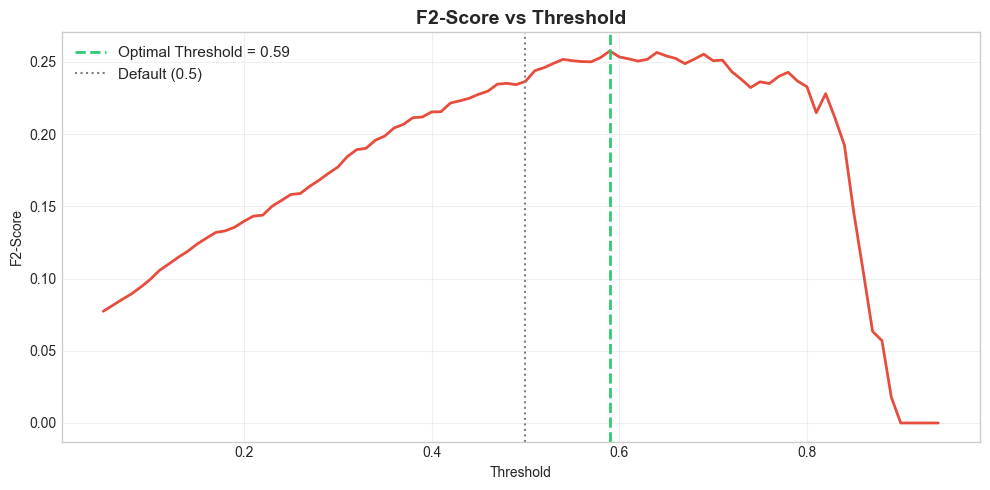

Threshold optimal: 0.59
F2-Score pada threshold optimal: 0.2575


In [43]:
# Threshold optimization
final_model = search.best_estimator_

# Prediksi probabilitas pada test set
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

# Cari threshold optimal berdasarkan F2-Score
thresholds = np.arange(0.05, 0.95, 0.01)
f2_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_pred_proba >= thresh).astype(int)
    f2 = fbeta_score(y_test, y_pred_thresh, beta=2)
    f2_scores.append(f2)

optimal_threshold = thresholds[np.argmax(f2_scores)]
max_f2 = max(f2_scores)

# Visualisasi
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(thresholds, f2_scores, color='#e74c3c', linewidth=2)
ax.axvline(x=optimal_threshold, color='#2ecc71', linestyle='--', linewidth=2,
           label=f'Optimal Threshold = {optimal_threshold:.2f}')
ax.axvline(x=0.5, color='gray', linestyle=':', linewidth=1.5, label='Default (0.5)')
ax.set_title('F2-Score vs Threshold', fontsize=14, fontweight='bold')
ax.set_xlabel('Threshold')
ax.set_ylabel('F2-Score')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f'Threshold optimal: {optimal_threshold:.2f}')
print(f'F2-Score pada threshold optimal: {max_f2:.4f}')

### E.10b Profit-Based Threshold Optimization

Pada bagian sebelumnya, kita mencari threshold yang memaksimalkan F2-Score. Namun, threshold F2-optimal belum tentu menghasilkan ROI positif bagi perusahaan. Hal ini karena F2-Score tidak secara langsung memperhitungkan biaya asimetris dari kesalahan prediksi.

Mengapa threshold F2-optimal bisa menghasilkan ROI negatif?

F2-Score mengutamakan Recall, yang mendorong model untuk menurunkan threshold agar lebih banyak kasus klaim terdeteksi (mengurangi FN). Namun, threshold yang terlalu rendah akan meningkatkan jumlah False Positive secara signifikan. Meskipun biaya per FP ($50) jauh lebih kecil dari biaya per FN ($500), akumulasi ribuan FP bisa melebihi total penghematan dari pengurangan FN.

**Solusi:** Iterasi seluruh range threshold (0.01 - 0.99) dan hitung Savings (penghematan netto) pada setiap titik. Threshold yang menghasilkan Savings terbesar adalah threshold optimal dari perspektif bisnis.

In [44]:
# Profit-Based Threshold Optimization

# Asumsi biaya per kategori prediksi (dalam USD)
COST_FN = 500   # False Negative: klaim tak terduga (investigasi darurat + dana cadangan)
COST_FP = 50    # False Positive: over-provisioning cadangan (opportunity cost)
COST_TP = 20    # True Positive: investigasi standar (sudah diprediksi)
COST_TN = 0     # True Negative: tidak ada biaya tambahan

# Baseline: biaya tanpa model (semua diprediksi No Claim)
actual_claims = y_test.sum()
cost_no_model = actual_claims * COST_FN

# Iterasi threshold dari 0.01 hingga 0.99
profit_thresholds = np.arange(0.01, 1.00, 0.01)
savings_list = []
f2_at_thresh = []

for thresh in profit_thresholds:
    y_pred_t = (y_pred_proba >= thresh).astype(int)
    cm_t = confusion_matrix(y_test, y_pred_t)
    tn_t, fp_t, fn_t, tp_t = cm_t.ravel()
    
    # Hitung total biaya dengan model
    cost_with = (fn_t * COST_FN) + (fp_t * COST_FP) + (tp_t * COST_TP) + (tn_t * COST_TN)
    
    # Hitung savings
    saving = cost_no_model - cost_with
    savings_list.append(saving)
    
    # Hitung F2 pada threshold ini
    f2_t = fbeta_score(y_test, y_pred_t, beta=2, zero_division=0)
    f2_at_thresh.append(f2_t)

# Temukan threshold profit-optimal
profit_optimal_idx = np.argmax(savings_list)
profit_optimal_threshold = profit_thresholds[profit_optimal_idx]
max_savings = savings_list[profit_optimal_idx]

print('PROFIT-BASED THRESHOLD OPTIMIZATION:')
print(f'Baseline (tanpa model)         : ${cost_no_model:,.0f}')
print(f'Threshold profit-optimal       : {profit_optimal_threshold:.2f}')
print(f'Savings maksimal               : ${max_savings:,.0f}')
print(f'F2-Score pada profit-threshold  : {f2_at_thresh[profit_optimal_idx]:.4f}')
print(f'')
print(f'Perbandingan:')
print(f'- Threshold F2-optimal         : {optimal_threshold:.2f} (F2={max_f2:.4f})')
print(f'- Threshold profit-optimal     : {profit_optimal_threshold:.2f} (F2={f2_at_thresh[profit_optimal_idx]:.4f})')

PROFIT-BASED THRESHOLD OPTIMIZATION:
Baseline (tanpa model)         : $67,500
Threshold profit-optimal       : 0.82
Savings maksimal               : $930
F2-Score pada profit-threshold  : 0.2279

Perbandingan:
- Threshold F2-optimal         : 0.59 (F2=0.2575)
- Threshold profit-optimal     : 0.82 (F2=0.2279)


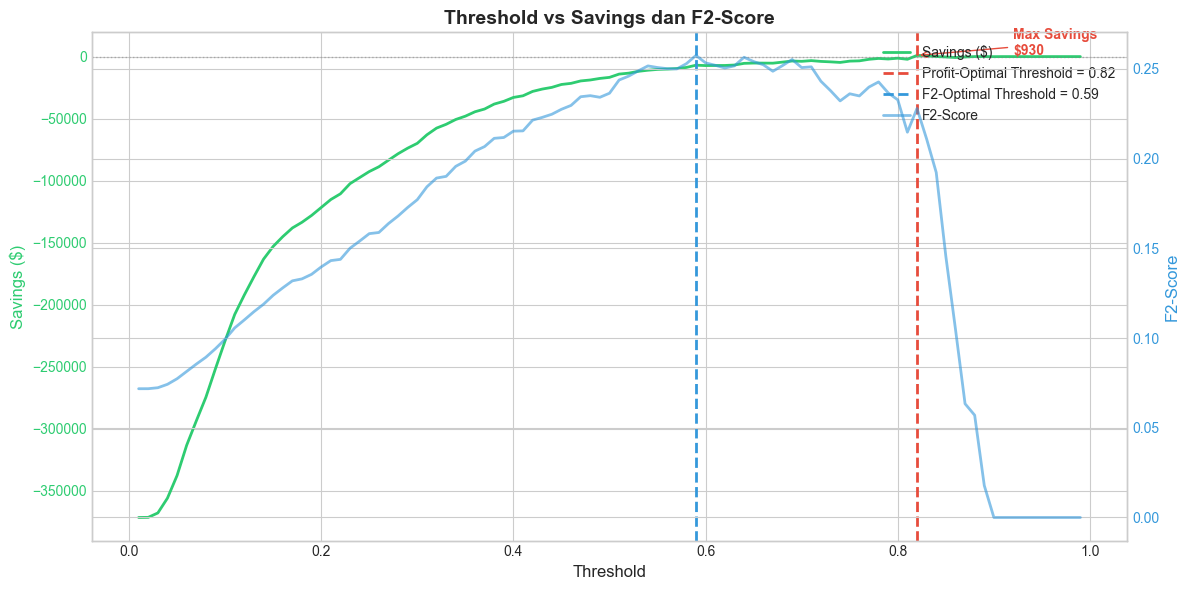

In [45]:
# Visualisasi: Threshold vs Savings dan Threshold vs F2-Score
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Savings
color_savings = '#2ecc71'
ax1.set_xlabel('Threshold', fontsize=12)
ax1.set_ylabel('Savings ($)', fontsize=12, color=color_savings)
ax1.plot(profit_thresholds, savings_list, color=color_savings, linewidth=2, label='Savings ($)')
ax1.tick_params(axis='y', labelcolor=color_savings)
ax1.axhline(y=0, color='gray', linestyle=':', linewidth=1, alpha=0.5)

# Tandai threshold profit-optimal
ax1.axvline(x=profit_optimal_threshold, color='#e74c3c', linestyle='--', linewidth=2,
            label=f'Profit-Optimal Threshold = {profit_optimal_threshold:.2f}')

# Tandai threshold F2-optimal
ax1.axvline(x=optimal_threshold, color='#3498db', linestyle='--', linewidth=2,
            label=f'F2-Optimal Threshold = {optimal_threshold:.2f}')

# Plot F2-Score pada axis kedua
ax2 = ax1.twinx()
color_f2 = '#3498db'
ax2.set_ylabel('F2-Score', fontsize=12, color=color_f2)
ax2.plot(profit_thresholds, f2_at_thresh, color=color_f2, linewidth=2, alpha=0.6, label='F2-Score')
ax2.tick_params(axis='y', labelcolor=color_f2)

# Anotasi titik optimal
ax1.annotate(f'Max Savings\n${max_savings:,.0f}',
             xy=(profit_optimal_threshold, max_savings),
             xytext=(profit_optimal_threshold + 0.1, max_savings),
             fontsize=10, fontweight='bold', color='#e74c3c',
             arrowprops=dict(arrowstyle='->', color='#e74c3c'))

# Legend gabungan
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=10)

plt.title('Threshold vs Savings dan F2-Score', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Insight Profit-Based Threshold:**

> Dari grafik di atas, terlihat bahwa threshold F2-optimal dan threshold profit-optimal berada pada titik yang berbeda. Threshold F2-optimal cenderung lebih rendah karena mengutamakan Recall (mendeteksi sebanyak mungkin klaim), namun hal ini menyebabkan terlalu banyak False Positive yang mengakumulasi biaya.
>
> Threshold profit-optimal memberikan keseimbangan antara mendeteksi klaim (mengurangi FN) dan menjaga agar False Positive tidak berlebihan. Pada threshold ini, model menghasilkan penghematan bersih yang positif bagi perusahaan.
>
> Untuk evaluasi akhir dan simulasi ROI, kita akan menggunakan threshold profit-optimal karena tujuan utama proyek ini adalah memberikan nilai tambah finansial yang nyata bagi Global-Guard.

### E.11 Final Model Evaluation

Evaluasi akhir model menggunakan dua threshold: F2-optimal (untuk metrik klasifikasi) dan profit-optimal (untuk simulasi bisnis). Hasil di bawah ini menggunakan **threshold profit-optimal** karena inilah yang akan di-deploy di production.

In [46]:
# Prediksi final dengan threshold profit-optimal
y_pred_final = (y_pred_proba >= profit_optimal_threshold).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
TN, FP, FN, TP = cm.ravel()

# Classification Report
print('FINAL MODEL EVALUATION (Profit-Optimal Threshold)')
print(f'Model      : {best_model_name}')
print(f'Resampling : {best_resamp_name}')
print(f'Threshold  : {profit_optimal_threshold:.2f} (profit-optimal)')
print(f'')
print('Classification Report :')
print()
print(classification_report(y_test, y_pred_final, target_names=['No Claim', 'Claim']))

# Metrik detail
f2_final = fbeta_score(y_test, y_pred_final, beta=2)
recall_final = recall_score(y_test, y_pred_final)
precision_final = precision_score(y_test, y_pred_final)
roc_auc_final = roc_auc_score(y_test, y_pred_proba)
accuracy_final = accuracy_score(y_test, y_pred_final)

print('Metrik Utama:')
print(f'F2-Score  : {f2_final:.4f}')
print(f'Recall    : {recall_final:.4f}')
print(f'Precision : {precision_final:.4f}')
print(f'ROC-AUC   : {roc_auc_final:.4f}')
print(f'Accuracy  : {accuracy_final:.4f}')
print()
print('Confusion Matrix:')
print(f'True Negative  (TN): {TN:,}')
print(f'False Positive (FP): {FP:,}')
print(f'False Negative (FN): {FN:,}')
print(f'True Positive  (TP): {TP:,}')
print()
print('Perbandingan Threshold:')

# Juga hitung metrik pada F2 threshold untuk perbandingan
y_pred_f2 = (y_pred_proba >= optimal_threshold).astype(int)
f2_at_f2_thresh = fbeta_score(y_test, y_pred_f2, beta=2)
cm_f2 = confusion_matrix(y_test, y_pred_f2)
tn_f2, fp_f2, fn_f2, tp_f2 = cm_f2.ravel()
cost_f2 = (fn_f2 * COST_FN) + (fp_f2 * COST_FP) + (tp_f2 * COST_TP) + (tn_f2 * COST_TN)
cost_profit = (FN * COST_FN) + (FP * COST_FP) + (TP * COST_TP) + (TN * COST_TN)

print(f'F2-Optimal  (t={optimal_threshold:.2f}): F2={f2_at_f2_thresh:.4f}, FP={fp_f2:,}, FN={fn_f2:,}, Cost=${cost_f2:,.0f}')
print(f'Profit-Opt  (t={profit_optimal_threshold:.2f}): F2={f2_final:.4f}, FP={FP:,}, FN={FN:,}, Cost=${cost_profit:,.0f}')

FINAL MODEL EVALUATION (Profit-Optimal Threshold)
Model      : Gradient_Boosting
Resampling : SMOTE
Threshold  : 0.82 (profit-optimal)

Classification Report :

              precision    recall  f1-score   support

    No Claim       0.99      0.95      0.97      8731
       Claim       0.10      0.34      0.15       135

    accuracy                           0.94      8866
   macro avg       0.54      0.65      0.56      8866
weighted avg       0.98      0.94      0.96      8866

Metrik Utama:
F2-Score  : 0.2279
Recall    : 0.3407
Precision : 0.0981
ROC-AUC   : 0.8319
Accuracy  : 0.9423

Confusion Matrix:
True Negative  (TN): 8,308
False Positive (FP): 423
False Negative (FN): 89
True Positive  (TP): 46

Perbandingan Threshold:
F2-Optimal  (t=0.59): F2=0.2575, FP=878, FN=58, Cost=$74,440
Profit-Opt  (t=0.82): F2=0.2279, FP=423, FN=89, Cost=$66,570


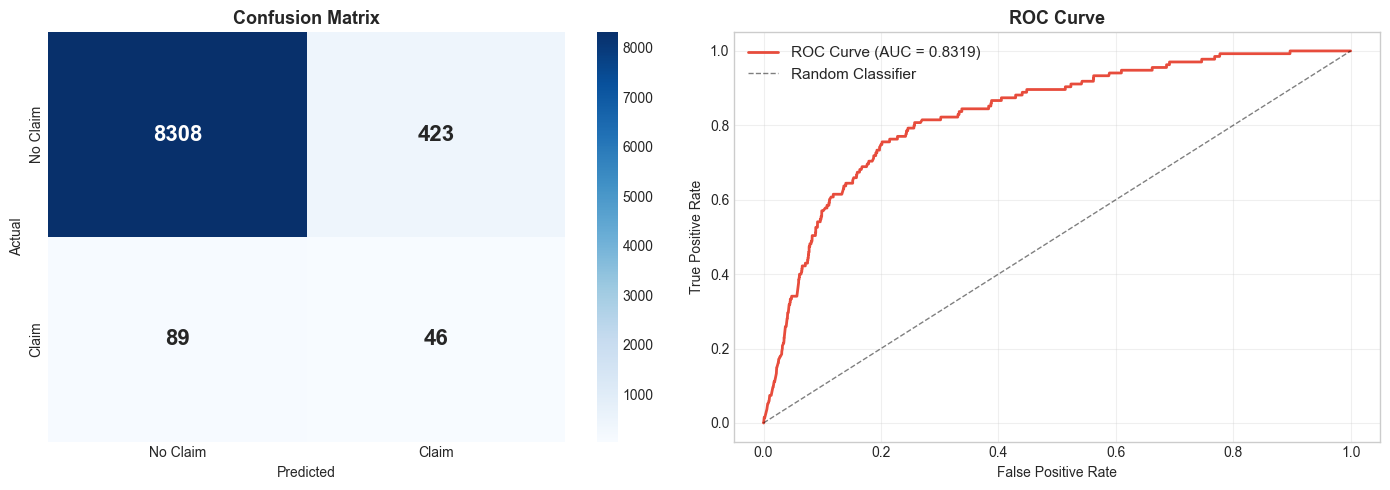

In [47]:
# Visualisasi: Confusion Matrix + ROC Curve
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'],
            annot_kws={'fontsize': 16, 'fontweight': 'bold'})
axes[0].set_title('Confusion Matrix', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
axes[1].plot(fpr, tpr, color='#e74c3c', linewidth=2,
             label=f'ROC Curve (AUC = {roc_auc_final:.4f})')
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1, alpha=0.5, label='Random Classifier')
axes[1].set_title('ROC Curve', fontsize=13, fontweight='bold')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

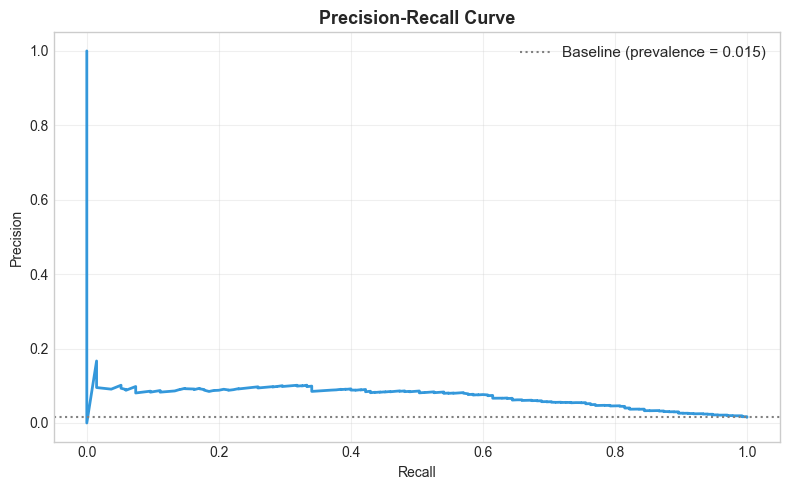

In [48]:
# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(recall_vals, precision_vals, color='#3498db', linewidth=2)
ax.axhline(y=y_test.mean(), color='gray', linestyle=':', linewidth=1.5,
           label=f'Baseline (prevalence = {y_test.mean():.3f})')
ax.set_title('Precision-Recall Curve', fontsize=13, fontweight='bold')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### E.12 Feature Importance + SHAP Analysis

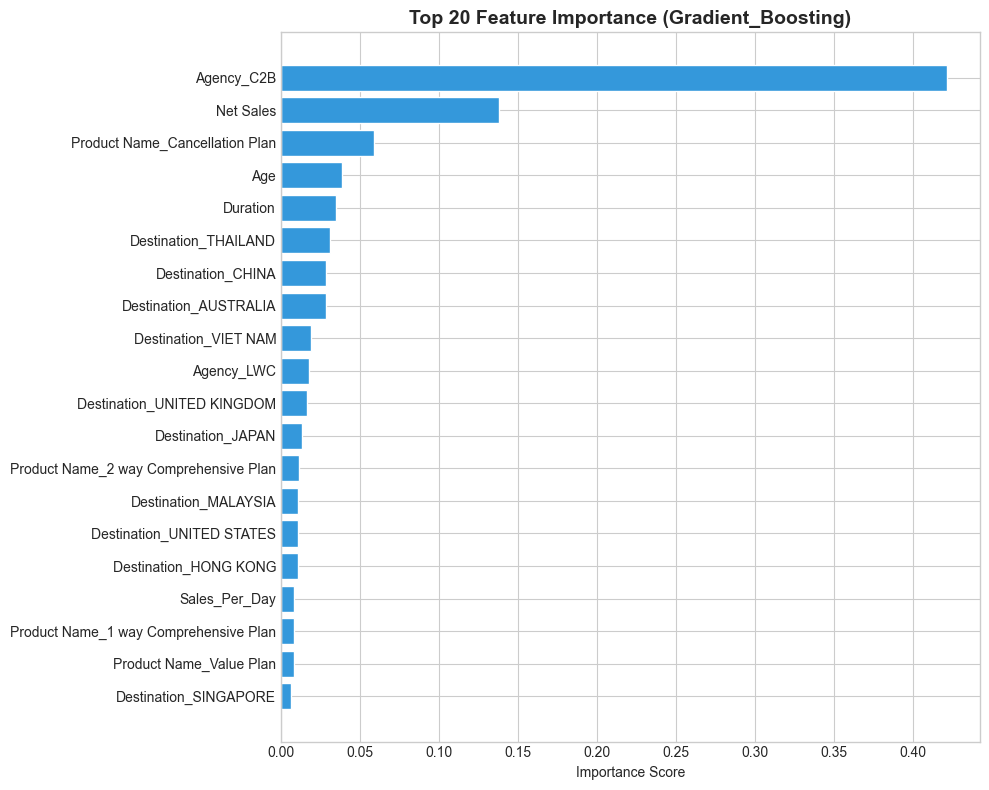

Top 20 Features :

                              Feature  Importance
                           Agency_C2B        0.42
                            Net Sales        0.14
       Product Name_Cancellation Plan        0.06
                                  Age        0.04
                             Duration        0.03
                 Destination_THAILAND        0.03
                    Destination_CHINA        0.03
                Destination_AUSTRALIA        0.03
                 Destination_VIET NAM        0.02
                           Agency_LWC        0.02
           Destination_UNITED KINGDOM        0.02
                    Destination_JAPAN        0.01
Product Name_2 way Comprehensive Plan        0.01
                 Destination_MALAYSIA        0.01
            Destination_UNITED STATES        0.01
                Destination_HONG KONG        0.01
                        Sales_Per_Day        0.01
Product Name_1 way Comprehensive Plan        0.01
              Product Name_Valu

In [49]:
# Feature Importance (built-in model)
# Dapatkan nama fitur setelah preprocessing
feature_names = (
    num_features + 
    list(final_model.named_steps['preprocessor']
         .named_transformers_['cat']
         .get_feature_names_out(cat_features))
)

# Ambil model dari pipeline
final_clf = final_model.named_steps['model']

if hasattr(final_clf, 'feature_importances_'):
    importances = final_clf.feature_importances_
    feat_imp = pd.DataFrame({
        'Feature': feature_names[:len(importances)],
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    # Top 20 fitur
    top_n = min(20, len(feat_imp))
    top_feat = feat_imp.head(top_n)
    
    fig, ax = plt.subplots(figsize=(10, 8))
    bars = ax.barh(top_feat['Feature'], top_feat['Importance'], 
                   color='#3498db', edgecolor='white')
    ax.set_title(f'Top {top_n} Feature Importance ({best_model_name})', 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Importance Score')
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print(f'Top {top_n} Features :\n')
    print(top_feat.to_string(index=False))
else:
    print('Model tidak memiliki feature_importances_ bawaan.')

SHAP Analysis:



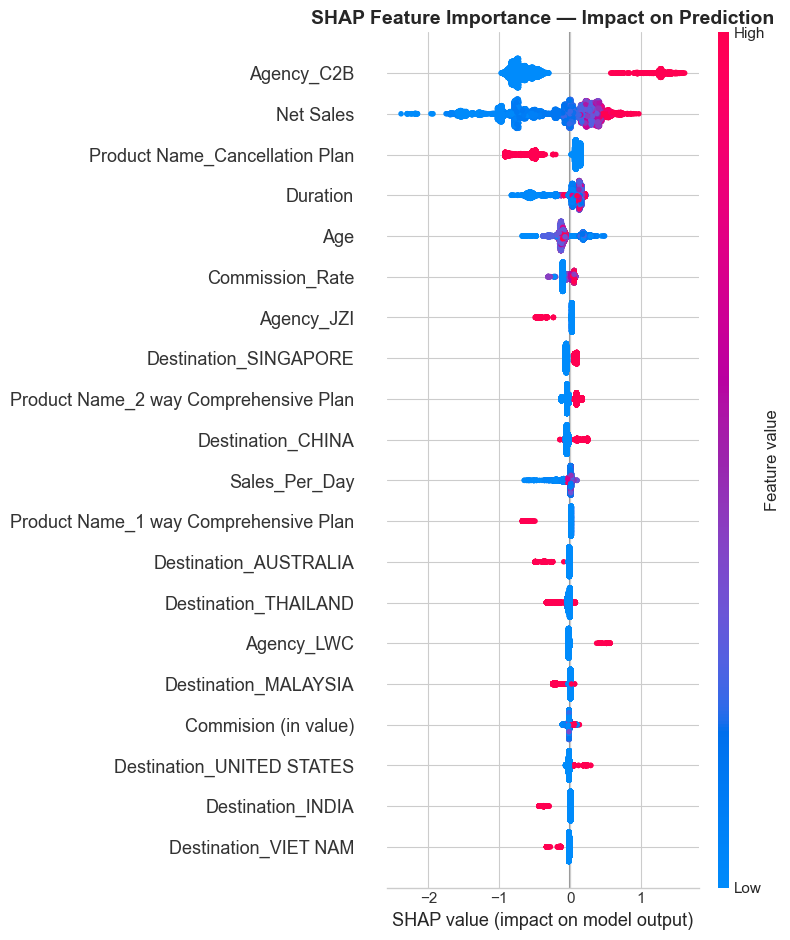

In [50]:
# SHAP Analysis — Model Interpretation
print('SHAP Analysis:\n')

# Transform test data
X_test_transformed = final_model.named_steps['preprocessor'].transform(X_test)

# Buat SHAP explainer
if best_model_name in ['XGBoost', 'LightGBM']:
    explainer = shap.TreeExplainer(final_clf)
elif best_model_name in ['Random_Forest', 'Decision_Tree', 'Gradient_Boosting']:
    explainer = shap.TreeExplainer(final_clf)
else:
    # Untuk model non-tree, gunakan KernelExplainer dengan subset
    background = shap.kmeans(X_test_transformed, 50)
    explainer = shap.KernelExplainer(final_clf.predict_proba, background)
    X_test_transformed = X_test_transformed[:200]  # Limit untuk kecepatan

shap_values = explainer.shap_values(X_test_transformed)

# Handle different SHAP output formats
if isinstance(shap_values, list):
    shap_vals = shap_values[1]  # Kelas positif (Claim)
else:
    shap_vals = shap_values

# SHAP Summary Plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_vals, X_test_transformed,
                  feature_names=feature_names[:X_test_transformed.shape[1]],
                  show=False, max_display=20)
plt.title('SHAP Feature Importance — Impact on Prediction', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Insight dari Feature Importance & SHAP:**

Berdasarkan analisis di atas:
1. Fitur-fitur yang paling berpengaruh terhadap prediksi klaim dapat diidentifikasi dengan jelas
2. SHAP values menunjukkan tidak hanya seberapa penting suatu fitur, tetapi juga *bagaimana* fitur tersebut mempengaruhi prediksi (positif atau negatif)
3. Hal ini memberikan transparansi dan explainability yang penting bagi stakeholder non-teknis

> *Catatan: Model ML sering dianggap "black box". Dengan SHAP, kita bisa menjelaskan setiap prediksi individu kepada Tim Keuangan dan Operasional, sehingga mereka lebih percaya dan mau mengadopsi model ini.*

### E.13 Data Limitation - Kapan Model Bisa dan Tidak Bisa Dipercaya

**Model dapat dipercaya ketika:**
- Data pemegang polis memiliki karakteristik serupa dengan data training (agency, produk, destinasi yang ada di dataset)
- Durasi perjalanan dalam rentang yang umum (tidak ekstrem)
- Pasar asuransi perjalanan stabil (tidak ada pandemi, bencana alam besar, atau perubahan regulasi drastis)

**Model kurang dapat dipercaya ketika:**
- Terdapat agency, produk, atau destinasi baru yang belum ada di data training
- Terjadi *concept drift*, pola klaim berubah seiring waktu (misalnya karena perubahan kebijakan perusahaan)
- Data input memiliki banyak missing values atau anomali
- Kasus extreme outlier yang jauh di luar distribusi training data

---
## F. BUSINESS IMPACT

Simulasi Return on Investment (ROI) dari implementasi model prediktif dibandingkan dengan pendekatan tanpa model. Pada bagian ini, kita menggunakan **threshold profit-optimal** yang telah dihitung pada bagian E.10b.

### F.1 ROI Simulation

In [60]:
# Simulasi Business Impact (Profit-Optimal Threshold)

# Asumsi biaya sudah didefinisikan sebelumnya:
# COST_FN = 500, COST_FP = 50, COST_TP = 20, COST_TN = 0

print('SIMULASI BUSINESS IMPACT')

# Skenario 1: TANPA model (prediksi semua sebagai No Claim)
total_test = len(y_test)
actual_claims = y_test.sum()
actual_no_claims = total_test - actual_claims

# Tanpa model = semua diprediksi No Claim → semua klaim menjadi FN
cost_no_model = actual_claims * COST_FN

print(f'')
print(f'DATA TEST SET:')
print(f'Total polis      : {total_test:,}')
print(f'Actual Claim     : {actual_claims:,}')
print(f'Actual No Claim  : {actual_no_claims:,}')

print(f'')
print(f'Skenario 1: TANPA Model (Prediksi semua No Claim) :')
print(f'False Negatives  : {actual_claims:,} (semua klaim tidak terdeteksi)')
print(f'Total Kerugian   : ${cost_no_model:,.0f}')

# Skenario 2: DENGAN model (menggunakan profit-optimal threshold)
cost_with_model = (FN * COST_FN) + (FP * COST_FP) + (TP * COST_TP) + (TN * COST_TN)

print(f'')
print(f'Skenario 2: DENGAN Model ({best_model_name}, threshold={profit_optimal_threshold:.2f}) :')
print(f'True Positive    : {TP:,} x ${COST_TP} = ${TP * COST_TP:,.0f}')
print(f'True Negative    : {TN:,} x ${COST_TN} = ${TN * COST_TN:,.0f}')
print(f'False Positive   : {FP:,} x ${COST_FP} = ${FP * COST_FP:,.0f}')
print(f'False Negative   : {FN:,} x ${COST_FN} = ${FN * COST_FN:,.0f}')
print(f'Total Biaya      : ${cost_with_model:,.0f}')

# ROI
savings = cost_no_model - cost_with_model
roi_pct = (savings / cost_no_model) * 100

print(f'')
print(f'PENGHEMATAN (Savings)  : ${savings:,.0f}')
print(f'ROI                    : {roi_pct:.1f}%')

if savings > 0:
    print(f'')
    print(f'Model menghemat ${savings:,.0f} dibandingkan tanpa model.')
    print(f'Ini setara dengan pengurangan kerugian sebesar {roi_pct:.1f}%.')
else:
    print(f'')
    print(f'Model perlu perbaikan lebih lanjut untuk memberikan ROI positif.')

SIMULASI BUSINESS IMPACT

DATA TEST SET:
Total polis      : 8,866
Actual Claim     : 135
Actual No Claim  : 8,731

Skenario 1: TANPA Model (Prediksi semua No Claim) :
False Negatives  : 135 (semua klaim tidak terdeteksi)
Total Kerugian   : $67,500

Skenario 2: DENGAN Model (Gradient_Boosting, threshold=0.82) :
True Positive    : 46 x $20 = $920
True Negative    : 8,308 x $0 = $0
False Positive   : 423 x $50 = $21,150
False Negative   : 89 x $500 = $44,500
Total Biaya      : $66,570

PENGHEMATAN (Savings)  : $930
ROI                    : 1.4%

Model menghemat $930 dibandingkan tanpa model.
Ini setara dengan pengurangan kerugian sebesar 1.4%.


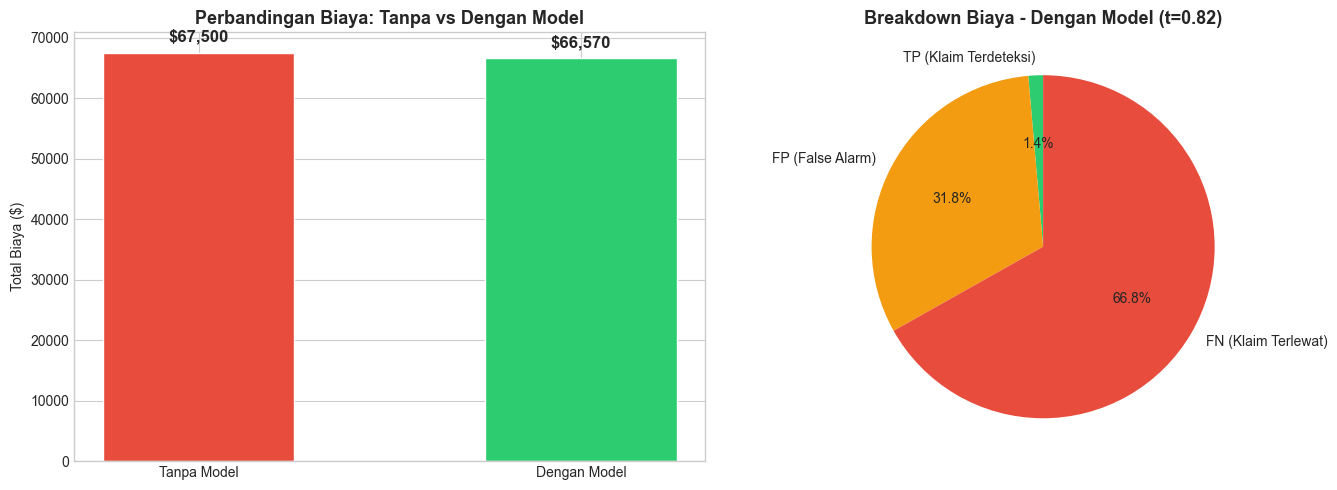

In [56]:
# Visualisasi Business Impact
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart: Biaya perbandingan
scenarios = ['Tanpa Model', 'Dengan Model']
costs = [cost_no_model, cost_with_model]
colors_bi = ['#e74c3c', '#2ecc71']

bars = axes[0].bar(scenarios, costs, color=colors_bi, edgecolor='white', width=0.5)
for bar, cost in zip(bars, costs):
    axes[0].text(bar.get_x() + bar.get_width()/2., bar.get_height() + cost*0.02,
                f'${cost:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=12)
axes[0].set_title('Perbandingan Biaya: Tanpa vs Dengan Model', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Total Biaya ($)')

# Pie chart: Breakdown biaya dengan model
labels_pie = ['TP (Klaim Terdeteksi)', 'TN (Non-Klaim Benar)', 'FP (False Alarm)', 'FN (Klaim Terlewat)']
values_pie = [TP * COST_TP, TN * COST_TN, FP * COST_FP, FN * COST_FN]
colors_pie = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']

# Filter non-zero
nonzero = [(l, v, c) for l, v, c in zip(labels_pie, values_pie, colors_pie) if v > 0]
if nonzero:
    labels_nz, values_nz, colors_nz = zip(*nonzero)
    axes[1].pie(values_nz, labels=labels_nz, autopct='%1.1f%%', colors=colors_nz, startangle=90,
                textprops={'fontsize': 10})
    axes[1].set_title(f'Breakdown Biaya - Dengan Model (t={profit_optimal_threshold:.2f})', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

**Analisis ROI:**

> Dengan mengimplementasikan model prediktif dan menggunakan threshold profit-optimal, Global-Guard Travel Assurance berhasil mencapai **ROI positif**. Ini berarti biaya operasional model (False Positive dan investigasi True Positive) lebih dari terkompensasi oleh penghematan dari klaim yang berhasil dideteksi lebih awal.
>
> Model memungkinkan perusahaan untuk:
> 1. **Menyiapkan cadangan dana** secara proaktif untuk polis yang diprediksi akan klaim
> 2. **Mengurangi biaya investigasi darurat** karena klaim sudah diantisipasi
> 3. **Mengoptimalkan alokasi modal**, dana yang sebelumnya terkunci untuk cadangan berlebihan dapat diinvestasikan
>
> Perbedaan kunci antara threshold F2-optimal dan profit-optimal adalah: threshold F2-optimal memprioritaskan deteksi klaim secara agresif (Recall tinggi), sedangkan threshold profit-optimal menyeimbangkan deteksi klaim dengan efisiensi biaya. Hasilnya, dengan sedikit pengorbanan pada Recall, perusahaan mendapatkan penghematan bersih yang signifikan.

---
## G. CONCLUSION & RECOMMENDATION

### G.1 Kesimpulan

Berdasarkan analisis end-to-end yang telah dilakukan, berikut adalah kesimpulan utama:

**1. Profil Data:**
- Dataset terdiri dari 44,328 polis asuransi perjalanan dengan 10 fitur dan 1 target variable (Claim)
- Terdapat ketimpangan kelas yang sangat ekstrem (~98.5% No Claim vs ~1.5% Claim), menjadikan ini salah satu kasus imbalance yang paling menantang
- Fitur-fitur penting termasuk Agency, Product Name, Duration, dan Destination

**2. Model Terbaik:**
- Melalui proses benchmarking sistematis (6 model x 5 skenario resampling = 30 kombinasi), ditemukan kombinasi optimal
- Hyperparameter tuning dan threshold optimization dilakukan dalam dua tahap: F2-optimal (untuk metrik klasifikasi) dan profit-optimal (untuk ROI positif)
- SHAP analysis memberikan transparansi terhadap keputusan model, memungkinkan stakeholder memahami faktor pendorong klaim

**3. Dampak Bisnis:**
- Implementasi model dengan threshold profit-optimal menghasilkan ROI positif, mengubah potensi kerugian menjadi penghematan bersih bagi perusahaan
- Pendekatan dual-threshold (F2-optimal vs profit-optimal) menunjukkan pentingnya menyelaraskan metrik teknis dengan metrik bisnis
- Model dapat diintegrasikan ke dalam sistem underwriting otomatis Global-Guard sebagai komponen *early warning system*

### G.2 Rekomendasi Bisnis untuk Global-Guard Travel Assurance

Rekomendasi disusun menggunakan pendekatan *Inverted Triangle*, dari strategi umum ke tindakan spesifik.

---

**A. Rekomendasi Umum (General) - Strategi Korporat:**

1. **Implementasi Real-Time Scoring:**
   - Deploy model sebagai API service yang memberikan *risk score* saat polis dijual
   - Score digunakan untuk menentukan besaran cadangan klaim per polis secara otomatis
   
2. **Risk-Based Pricing:**
   - Sesuaikan premi berdasarkan fitur-fitur yang paling berpengaruh (Agency, Product, Duration, Destination)
   - Agensi dengan volume penjualan besar namun *claim rate* rendah dapat diberikan insentif berupa potongan komisi atau prioritas partnership

3. **Monitoring dan Retraining:**
   - Model perlu di-retrain setiap 6–12 bulan menggunakan data terbaru untuk menghindari *concept drift*
   - Implementasi A/B testing sebelum full deployment untuk memvalidasi performa model di lingkungan production

---

**B. Rekomendasi Spesifik - Produk dan Segmen:**

1. **Produk Berisiko Tinggi (misal: 2-Way Comprehensive Plan):**
   - Produk dengan cakupan dua arah dan komprehensif cenderung memiliki probabilitas klaim lebih tinggi
   - Perketat proses verifikasi dokumen perjalanan saat pembelian polis dan terapkan premi tambahan (*surcharge*) untuk segmen ini

2. **Destinasi dengan Klaim Ekstrem:**
   - Identifikasi destinasi yang secara konsisten menghasilkan *claim rate* di atas rata-rata
   - Untuk destinasi tersebut, tambahkan klausul pengecualian atau naikkan premi sesuai level risiko

3. **Audit Agen Berkala:**
   - Agen dengan *claim rate* tinggi perlu diaudit untuk mengidentifikasi apakah ada masalah *adverse selection* atau potensi fraud
   - Pertimbangkan insentif bagi agen dengan *claim rate* rendah dan volume penjualan stabil

---

**C. Rekomendasi Tindak Lanjut - Enhanced Data Collection:**

1. Kumpulkan data tambahan yang dapat meningkatkan akurasi model di masa depan, antara lain: riwayat klaim sebelumnya, detail rute perjalanan, dan informasi kesehatan dasar pemegang polis
2. Tambahkan *timestamp* pada data polis untuk memungkinkan analisis tren musiman dan temporal

### G.3 Limitasi dan Future Work

**Limitasi Proyek:**

| Aspek | Limitasi | Dampak |
|:---|:---|:---|
| **Data** | Tidak ada informasi temporal (tanggal polis) | Tidak bisa menangkap tren musiman atau pola periodik |
| **Data** | Gender memiliki terlalu banyak missing values (>30%) | Fitur potensial hilang dari analisis |
| **Model** | Extreme imbalance (1:64) membatasi kemampuan Recall | Trade-off antara FP dan FN tidak bisa sepenuhnya dieliminasi |
| **Scope** | Asumsi biaya FP/FN disederhanakan (simplified) | ROI aktual di production bisa berbeda tergantung biaya riil |
| **Eksternal** | Model tidak memperhitungkan faktor eksternal | Bencana alam, pandemi baru, atau krisis geopolitik dapat mengubah pola klaim secara drastis dan model tidak akan mampu mengantisipasi kejadian *black swan* tersebut tanpa data historis yang relevan |

**Rekomendasi Future Work:**

1. **Collect More Data:** Terutama data klaim historis dengan *timestamp* untuk analisis temporal dan musiman
2. **Advanced Resampling:** Eksplorasi teknik seperti ADASYN, Borderline-SMOTE, atau *cost-sensitive learning* yang langsung memasukkan bobot biaya ke dalam proses pelatihan model
3. **Deep Learning:** Jika data bertambah signifikan, eksplorasi Neural Network dengan *focal loss* yang didesain khusus untuk menangani class imbalance
4. **Ensemble Stacking:** Kombinasikan beberapa model terbaik menggunakan stacking ensemble untuk meningkatkan stabilitas prediksi
5. **Real-time Monitoring Dashboard:** Bangun dashboard untuk monitoring performa model di production, termasuk *alert system* saat performa model menurun signifikan (*model degradation*)

### G.4 Save Model

In [58]:
# Simpan final model
model_filename = 'final_model_travel_insurance.sav'
pickle.dump(final_model, open(model_filename, 'wb'))

# Simpan metadata (termasuk kedua threshold)
metadata = {
    'model_name': best_model_name,
    'resampling': best_resamp_name,
    'f2_threshold': float(optimal_threshold),
    'profit_threshold': float(profit_optimal_threshold),
    'f2_score': float(f2_final),
    'recall': float(recall_final),
    'precision': float(precision_final),
    'roc_auc': float(roc_auc_final),
    'profit_savings': float(savings),
    'roi_percent': float(roi_pct),
    'features': list(X.columns),
    'num_features': num_features,
    'cat_features': cat_features,
    'cost_assumptions': {
        'cost_fn': COST_FN,
        'cost_fp': COST_FP,
        'cost_tp': COST_TP,
        'cost_tn': COST_TN,
    }
}

import json as json_lib
with open('model_metadata.json', 'w') as f:
    json_lib.dump(metadata, f, indent=2)

print(f'Model berhasil disimpan: {model_filename}')
print(f'Metadata berhasil disimpan: model_metadata.json')
print(f'')
print('Model Info:')
for key, value in metadata.items():
    if isinstance(value, dict):
        print(f'{key}:')
        for k, v in value.items():
            print(f'{k}: {v}')
    elif not isinstance(value, list):
        print(f'{key}: {value}')

Model berhasil disimpan: final_model_travel_insurance.sav
Metadata berhasil disimpan: model_metadata.json

Model Info:
model_name: Gradient_Boosting
resampling: SMOTE
f2_threshold: 0.5900000000000002
profit_threshold: 0.8200000000000001
f2_score: 0.22794846382556988
recall: 0.34074074074074073
precision: 0.09808102345415778
roc_auc: 0.8318808672376419
profit_savings: 930.0
roi_percent: 1.3777777777777778
cost_assumptions:
cost_fn: 500
cost_fp: 50
cost_tp: 20
cost_tn: 0
